# Notebook 13 - Solving Differential Equations Numerically


In [119]:
import sympy as sy
sy.init_printing() # display better looking symbols in Jupyter notebooks
import numpy as np
import matplotlib.pyplot as plt


## Part 1 - Euler's Method

Initial goal: Solve first-order one-variable ordinary differential equations (given an initial condition). These equations will take the form:

$\frac{dx}{dt}=f(x,t)$

For example, we could consider the case of linear drag where we have a velocity dependent force ($F_{\text{drag}} = -bv$, where $b$ is a constant):

$\sum F=ma$

$-bv(t)=m\frac{dv}{dt}$

$\frac{dv}{dt}=-\frac{b}{m}v(t)$

To solve an equation such as $\frac{dx}{dt}=f(x,t)$ numerically, we can first taylor expand $x(t)$ about a given point $t_0$, then evaluate the function some short time $\Delta t$ later:

$x(t)|_{t_0} = x(t_0)+\frac{(t-t_0)}{1!}\frac{d}{dt}x(t_0)+\frac{(t-t_0)^2}{2!}\frac{d^2}{dt^2}x(t_0)+...$


$x(t_0+\Delta t) = x(t_0)+\frac{((t_0+\Delta t)-t_0)}{1!}\frac{d}{dt}x(t_0)+\frac{((t_0+\Delta t)-t_0)^2}{2!}\frac{d^2}{dt^2}x(t_0)+...$

$x(t_0+\Delta t) = x(t_0)+\Delta t\frac{d}{dt}x(t_0)+\frac{1}{2}(\Delta t)^2\frac{d^2}{dt^2}x(t_0)+...$

Note our original differential equation is of the form $\frac{dx}{dt}=f(x,t)$. Plugging this in for $\frac{dx}{dt}$ we have:

$x(t_0+\Delta t) = x(t_0)+\Delta t f(x,t)+\mathcal{O}[(\Delta t)^2]+...$

If we neglect terms of order $(\Delta t)^2$, we then have ***Euler's method***:

$x(t_0+\Delta t) = x(t_0)+\Delta t f(x,t)$

That is, if we know the initial condition $x(t_0)$, we can estimate the value of x one small time step later $x(t_0+\Delta t)$ using the fact that we know the slope at $x(t_0)$ (since the differential equation tells us the slope: $\frac{dx}{dt}=f(x,t)$). We can repeat this after each time step to estimate the value one time step later.

#### Example: Velocity dependent force

One quick example: $\frac{dv}{dt}=-\frac{b}{m}v(t)$

We know the initial velocity is 10 m/s. $b=1$, $m=1$. We can estimate the value of the velocity after a few small time steps using Euler's method:


| t (s)    | v (m/s)   |
|:---:  |:---:|
| 0     | 10  |
| 0.1     | 10 - 0.1*10 =  9   |
| 0.2     | 9 - 0.1*9 =  8.1   |
| 0.3     | 8.1 - 0.1*8.1 =  7.29   |
| 0.4     | 7.29 - 0.1*8.1 =  6.561    |


#### Example: Newton's law of cooling

Let's code up an example using Newton's Law of Cooling:

$\frac{dT}{dt} = - k (T(t) - T_\text{env})$

Here k is a constant $k = \frac{hA}{mc}$ where $m$ is the mass, $c$ is the heat capacity, $h$ is the heat transfer coefficient, and $A$ is the surface area.

This equation shows us that the rate of cooling depends on the temperature difference between the object and the environment.

delta_t 3.75


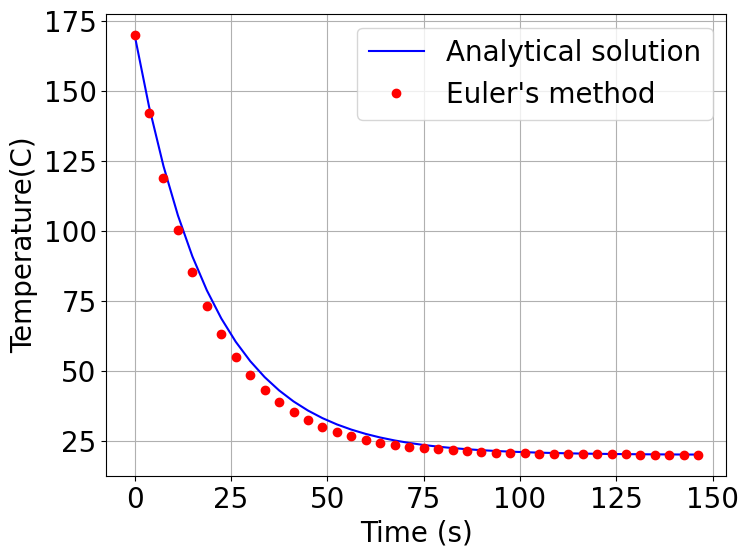

In [120]:
# Perform the Euler method to numerical solve a differential equation (Newton's heat equation)
#    given some starting condition

# Function which finds the slope
#  for a given time and temperature
def f_diffeq_rhs(t,k,T_env,T):
    myf = -k * ( T - T_env )
    #print(t, T, myf)
    return myf

# Function which evaluates the analytical solution
#  for a given time
def f_ana(t,k,T_env,T_0):
    analytical_f = T_env + ( T_0 - T_env )*np.exp(-k*t)
    return analytical_f


# Set time range (minutes)
a = 0.0
b = 150.0

# Set number of time divisions and step size delta_t
N = 40
delta_t = (b-a)/N
print("delta_t",delta_t)

# Define the initital temperature, the environment temperature, and the constant
T_0 = 170  # C
T_env = 20 # C
k = 0.05 # /min

# Array of time
tpoints  = np.arange(a,b,delta_t)

# Empty lists to store temperature
Tpoints_euler  = []
Tpoints_ana    = []

# Start the process at t=0
Temp = T_0

for t in tpoints:

    # put the temperatures for this time
    #  iteration into the array
    Tpoints_euler.append(Temp)
    Tpoints_ana.append( f_ana(t,k,T_env,T_0) )

    # Use the current time and temperature
    #  and the differential equation to find the slope
    #  at this time then perform euler's method
    #  to find the temp for the next iteration
    Temp += delta_t*f_diffeq_rhs(t,k,T_env,Temp)


plt.figure(figsize=(8,6))

plt.plot(tpoints,Tpoints_ana, "b" , label='Analytical solution')
plt.plot(tpoints,Tpoints_euler, "ro" , label="Euler's method")

plt.xlabel("Time (s)" , fontsize=20)
plt.ylabel("Temperature(C)" , fontsize=20)

plt.legend(loc='upper right', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)

plt.show()

Caution: In some situations a numerical solution for a differential equation can become unstable. Some differential equations more more susceptible to this. These are known as stiff differential equations. Alternative methods can be used if this is a problem.

delta_t 50.0


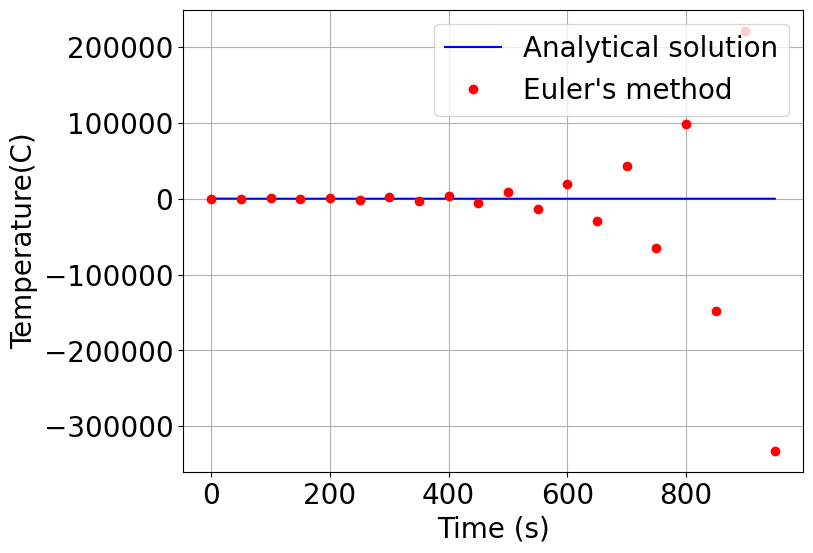

In [121]:
# Perform the Euler method to numerical solve a differential equation (Newton's heat equation)
#    given some starting condition

# Function which finds the slope
#  for a given time and temperature
def f_diffeq_rhs(t,k,T_env,T):
    myf = -k * ( T - T_env )
    #print(t, T, myf)
    return myf

# Function which evaluates the analytical solution
#  for a given time
def f_ana(t,k,T_env,T_0):
    analytical_f = T_env + ( T_0 - T_env )*np.exp(-k*t)
    return analytical_f


# Set time range (minutes)
a = 0.0
b = 1000.0

# Set number of time divisions and step size delta_t
N = 20
delta_t = (b-a)/N
print("delta_t",delta_t)

# Define the initital temperature, the environment temperature, and the constant
T_0 = 170  # C
T_env = 20 # C
k = 0.05 # /min

# Array of time
tpoints_2  = np.arange(a,b,delta_t)

# Empty lists to store temperature
Tpoints_euler_2  = []
Tpoints_ana_2    = []

# Start the process at t=0
Temp = T_0

for t in tpoints_2:

    # put the temperatures for this time
    #  iteration into the array
    Tpoints_euler_2.append(Temp)
    Tpoints_ana_2.append( f_ana(t,k,T_env,T_0) )

    # Use the current time and temperature
    #  and the differential equation to find the slope
    #  at this time then perform euler's method
    #  to find the temp for the next iteration
    Temp += delta_t*f_diffeq_rhs(t,k,T_env,Temp)


plt.figure(figsize=(8,6))

plt.plot(tpoints_2,Tpoints_ana_2, "b" , label='Analytical solution')
plt.plot(tpoints_2,Tpoints_euler_2, "ro" , label="Euler's method")

plt.xlabel("Time (s)" , fontsize=20)
plt.ylabel("Temperature(C)" , fontsize=20)

plt.legend(loc='upper right', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)

plt.show()

## Part 2 - Solving Differential equaitons using built in tools

The scipy (scientific python) library includes multiple tools to solve ordinary diffential equation (ode) "initial value problems (ivp)". For example: scipy.integrate.odeint

Other languages have similar tools (C++ has odeint, matlab has dsolve, FORTRAN has odepack)

#### odeint
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

scipy.integrate.odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)

Here func is the function, y0 is the initial value, and t is the time array over which you would like to solve, and args is a tuple containing the value of constants.

delta_t 3.75


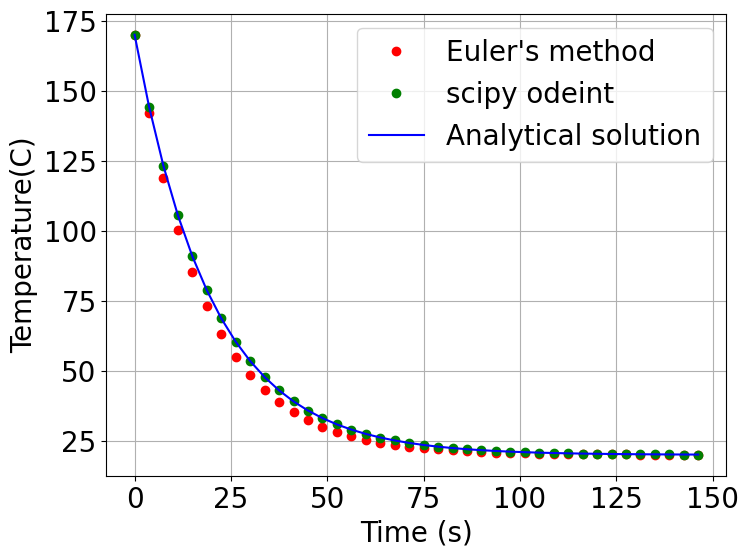

In [122]:
from scipy.integrate import odeint

############
# Define and solve the diffEQ

def f(T,t,k,T_env):
    myf = -k * ( T - T_env )
    return myf

# Define the initital temperature, the environment temperature, and the constant
T_0 = 170  # C
T_env = 20 # C
k = 0.05 # /min

# Set time range (minutes)
a = 0.0
b = 150.0

# Set number of time divisions and step size delta_t
N = 40
delta_t = (b-a)/N
print("delta_t",delta_t)

# Array of time
tpoints  = np.arange(a,b,delta_t)

# Solve
soln = odeint(f, T_0, tpoints, args=(k, T_env)) # returns an array of arrays, each containing the values for each function (in this case we only have the temperature function)
Tpoints_odeint = soln[:, 0]
#print(Tpoints_odeint)

############
# Make plots

plt.figure(figsize=(8,6))

plt.plot(tpoints,Tpoints_euler, "ro" , label="Euler's method")
plt.plot(tpoints,Tpoints_odeint, "go" , label="scipy odeint")
plt.plot(tpoints,Tpoints_ana, "b" , label='Analytical solution')

plt.xlabel("Time (s)" , fontsize=20)
plt.ylabel("Temperature(C)" , fontsize=20)

plt.legend(loc='upper right', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)

plt.show()


It is also possible to use a computer to find the analytical solution to a diffential equation (if possible).

Sympy is a python library for symbolic math (it is like a free Mathematica)

In [123]:
import sympy as sy
sy.init_printing() # display better looking symbols in Jupyter notebooks

In [124]:
t, T_0, T_env, k = sy.symbols("t, T_{0}, T_{env}, k")
T = sy.Function("T")

In [125]:
T(t)

T(t)

In [126]:
ode = sy.Derivative( T(t) , t ) + k*(T(t)-T_env)

In [127]:
sy.Eq(ode,0)

                      d           
k⋅(-T_{env} + T(t)) + ──(T(t)) = 0
                      dt          

In [128]:
solution = sy.dsolve(ode)

In [129]:
solution

           -k⋅t          
T(t) = C₁⋅ℯ     + T_{env}

In [130]:
solution.lhs

T(t)

In [131]:
solution.rhs

    -k⋅t          
C₁⋅ℯ     + T_{env}

In [132]:
sy.Eq( solution.lhs  , solution.rhs  )

           -k⋅t          
T(t) = C₁⋅ℯ     + T_{env}

In [133]:
sy.Eq( solution.lhs - solution.rhs ,0  )

      -k⋅t                     
- C₁⋅ℯ     - T_{env} + T(t) = 0

In [134]:
sy.Eq( solution.lhs.subs(t,0) -  solution.rhs.subs(t,0),0 )

-C₁ - T_{env} + T(0) = 0

In [135]:
C1 = sy.solve(  sy.Eq( solution.lhs.subs(t,0) -  solution.rhs.subs(t,0),0 ) )
C1

[{C₁: -T_{env} + T(0)}]

In [136]:
solution.subs(C1[0])


                                    -k⋅t
T(t) = T_{env} + (-T_{env} + T(0))⋅ℯ    

## Part 3 - Solving Simultaneous Differential Equations

In [137]:
# Define functions to solve simultaneous differential equations

# ------------------------------------------------------------------------
# Estimate the solution to a differential equation using Euler's method
def run_euler_vec(a,b,N,r_initial):

    delta_t = (b-a)/N  # find the step size delta_t
    r = r_initial      # Set the initial condition (r is a 1D numpy array (a vector))
    time_array  = np.arange(a,b,delta_t)  # array for iteration
    print("Run Euler: delta_t = ",delta_t, " r_initial = ",r_initial)

    # lists to track x and t for each step
    tpoints  = []
    xpoints  = []
    ypoints  = []

    # loop over the time range with step size delta_t
    for t in time_array:
        #print("x=",r[0],"y=",r[1],"[dx/dt,dy/dt]=",f(r,t))
        xpoints.append(r[0]) # put the values for this time into the array
        ypoints.append(r[1]) # put the values for this time into the array
        tpoints.append(t) # keep track of the time for plotting
        #  perform euler's method (setup the values for the next time iteration)
        r += delta_t * f(r,t)

    return xpoints, ypoints, tpoints

In [138]:
# ------------------------------------------------------------------------
# define two simultaneous ode
# dr/dt = f(r,t)
def f(r,t):
    x = r[0]
    y = r[1]
    fx = x*y - x
    fy = y - x*y + np.sin(t)**2
    return np.array([fx,fy],float)

# ------------------------------------------------------------------------

# Set time range a->b (seconds), the number of steps N, and the initial ocndition
a = 0.0
b = 10.0
N = 100
r_initial = np.array([1.0,1.0],float)

# Run the euler method
eu_ex85_x, eu_ex85_y, eu_ex85_t = run_euler_vec(a, b, N, r_initial)


Run Euler: delta_t =  0.1  r_initial =  [1. 1.]


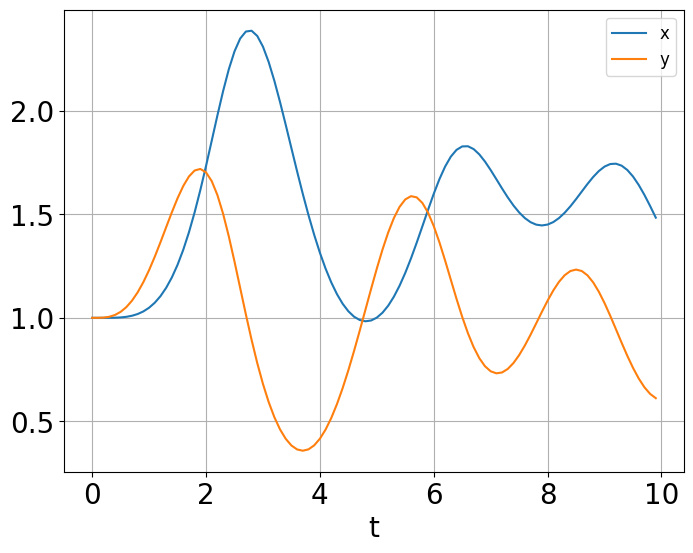

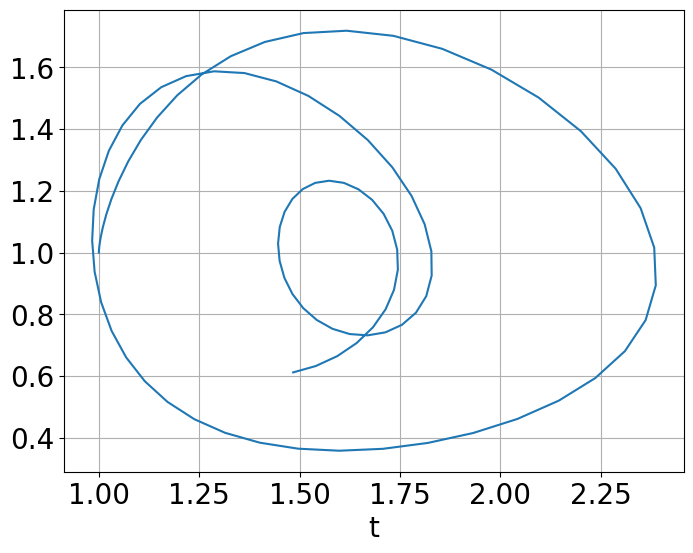

In [139]:
plt.figure(figsize=(8,6))
plt.plot(eu_ex85_t,eu_ex85_x, "-" , label="x")
plt.plot(eu_ex85_t,eu_ex85_y, "-" , label="y")
plt.xlabel("t" , fontsize=20)
plt.legend(loc='upper right', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
plt.plot(eu_ex85_x,eu_ex85_y, "-")
plt.xlabel("t" , fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.show()

Run Euler: delta_t =  0.03  r_initial =  [1. 1.]


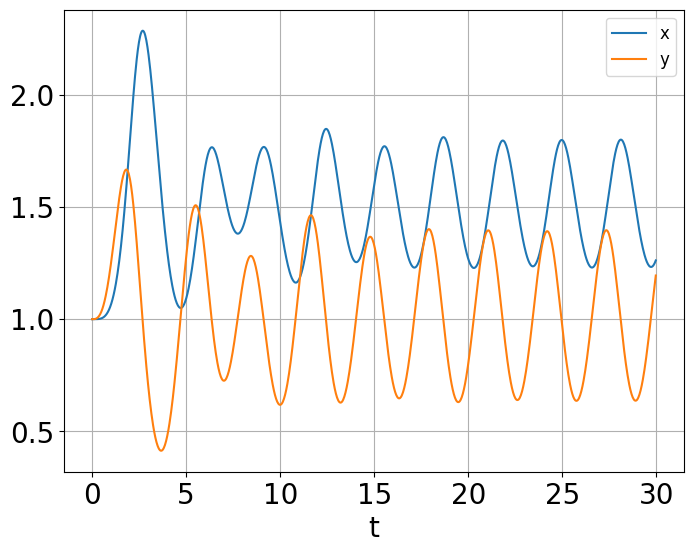

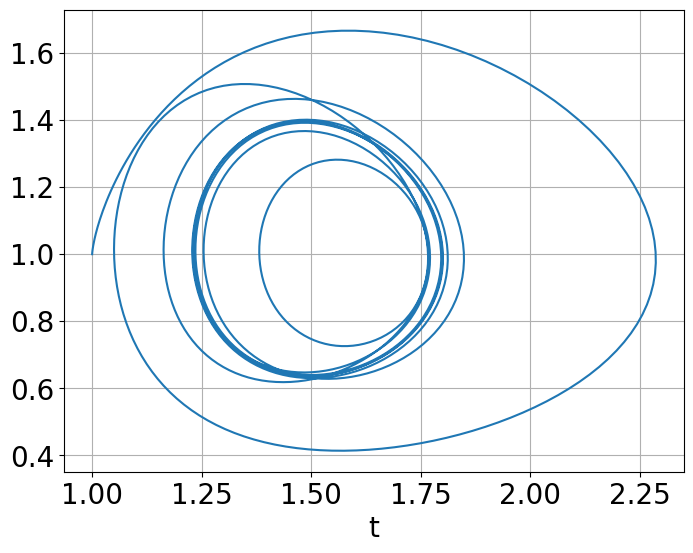

In [140]:
# Set time range a->b (seconds), the number of steps N, and the initial ocndition
a = 0.0
b = 30.0
N = 1000
r_initial = np.array([1.0,1.0],float)

# Run the euler method
eu_ex85_x, eu_ex85_y, eu_ex85_t = run_euler_vec(a, b, N, r_initial)


plt.figure(figsize=(8,6))
plt.plot(eu_ex85_t,eu_ex85_x, "-" , label="x")
plt.plot(eu_ex85_t,eu_ex85_y, "-" , label="y")
plt.xlabel("t" , fontsize=20)
plt.legend(loc='upper right', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
plt.plot(eu_ex85_x,eu_ex85_y, "-")
plt.xlabel("t" , fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.show()

### Simultaneous ODEs with built-in tools

Example:

"predator-prey equations" ("Lotka-Volterra")


Prey follow the equation:

$du/dt = au - buv$

Predator follow the equation:

$dv/dt = -cv + duv$


with the following notations:

    u: number of preys (for example, cattle)

    v: number of predators (for example, aliens)

    a, b, c, d are constant parameters defining the behavior of the population:

        a is the natural growing rate of cattle, when there's no aliens

        b is the natural dying rate of cattle, due to predation

        c is the natural dying rate of aliens, when there's no cattle

        d is the factor describing how many caught cattle help create a new alien


Prey have an unlimited food supply and reproduce exponentially (this comes from $du/dt = au$)

Prey die at a rate proportional to the rate at which they meet pretators ($du/dt = - buv$)


Predators reproduce exponentially if food is available. The rate is proportional to the ammount of food ($dv/dt = duv$)

Predators die without food ($dv/dt = -cv$)

In [141]:
# Cows vs Aliens. Predator prey
# Code based on:
# http://scipy-cookbook.readthedocs.io/items/LoktaVolterraTutorial.html

from numpy import *
import pylab as p
from scipy import integrate

# Definition of parameters
a = 1.   #  a growing rate of cattle, when there's no aliens
b = 0.1  #  b dying rate of cattle, due to predation
c = 1.5  #  c dying rate of aliens, when there's no cattle
d = 0.75 #  d factor describing how many caught cattle let create a new alien

def dX_dt(X, t=0):
    """ Return the growth rate of alien and cattle populations. """
    return array([ a*X[0] -   b*X[0]*X[1] ,
                  -c*X[1] + d*b*X[0]*X[1] ])

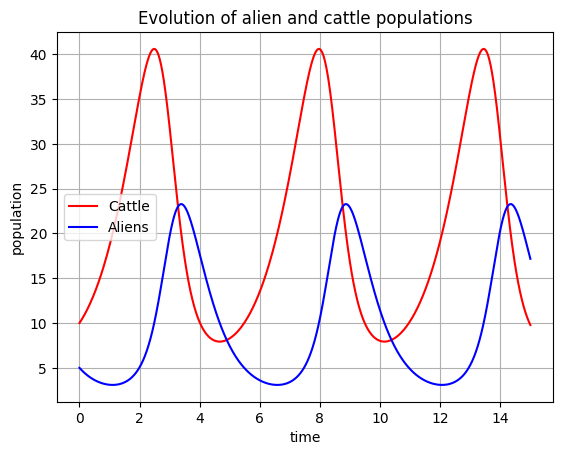

In [142]:
t = linspace(0, 15,  1000)              # time
X0 = array([10, 5])                     # initials conditions: 10 cattle and 5 aliens
X = integrate.odeint(dX_dt, X0, t)

cattle = X[:, 0]
aliens = X[:, 1]

f1 = p.figure()
p.plot(t, cattle, 'r-', label='Cattle')
p.plot(t, aliens  , 'b-', label='Aliens')
p.grid()
p.legend(loc='best')
p.xlabel('time')
p.ylabel('population')
p.title('Evolution of alien and cattle populations')
p.show()

# The Runge-Kutta set of methods

Goal: Solve differential equation of the form $\frac{dx}{dt}=f(x(t),t)$

Recall: Euler's method dropped terms of the order $\frac{1}{2}(\Delta t)^2\frac{d^2 x}{dt^2}=\frac{1}{2}(\Delta t)^2\frac{d f}{dt}$

We could add these terms to improve accuracy but we often don't know $\frac{d f}{dt}$

The Runge-Kutta (RK) set of methods can provide more accuracy without requiring us to solve any derivatives with only a moderate increase in algorithm complexity.

- First order Runge-Kutta method = "RK1" = "Euler's method"
- Second order Runge-Kutta method = "RK2" = "Midpoint method"
- Fourth order Runge-Kutta method = "RK4"

Euler's method uses the slope at time $t$ to estimate the value of $x(t)$ at time $t+\Delta t$

The ***midpoint method*** or ***RK2*** uses the slope at the midpoint instead $\frac{dx (t+\frac{1}{2}\Delta t)}{dt}$. This provides a much better approximation. Unforuntately we don't know the value of the function at the midpoint $x(t+\frac{1}{2}\Delta t)$. We can then use Euler's method to estimate this, then use the slope at the midpoint to estimate the next value of the function.

The ***RK4*** method uses a similar method to improve the accuracy. Perform a taylor expansion around multiple points and find linear combinations of these taylor expansions such that terms of order $(\Delta t)^2$, $(\Delta t)^3$ etc. are canceled.

#### Midpoint or "RK2" method

For a general differential equation of the form $\frac{dx}{dt}=f(x,t)$

$k_1 = \Delta t~f(x(t),t)$

$k_2 = \Delta t~f(x(t)+ \frac{1}{2} k_1, t+\frac{1}{2}\Delta t)$

$x(t+\Delta t) = x(t) + k_2$

This method is accurate to $(\Delta t)^2$ (errors of order $(\Delta t)^3$ for a single step)

Euler's method is accurate to $(\Delta t)$ (errors of order $(\Delta t)^2$ for a single step)

#### The 4th order Runge-Kutta Method "RK4"

$k_1 = \Delta t~f(x(t),t)$

$k_2 = \Delta t~f(x(t)+ \frac{1}{2} k_1, t+\frac{1}{2}\Delta t)$

$k_3 = \Delta t~f(x(t)+ \frac{1}{2} k_2, t+\frac{1}{2}\Delta t)$

$k_4 = \Delta t~f(x(t)+ k_3, t+\Delta t)$

$x(t+\Delta t) = x(t) + \frac{1}{6}(k_1+2k_2+2k_3+k_4)$

#### Exercise:

Below I've copied and pasted the Euler's method example from above.

Modify this code to include the Midpoint method (RK2).

delta_t 3.75


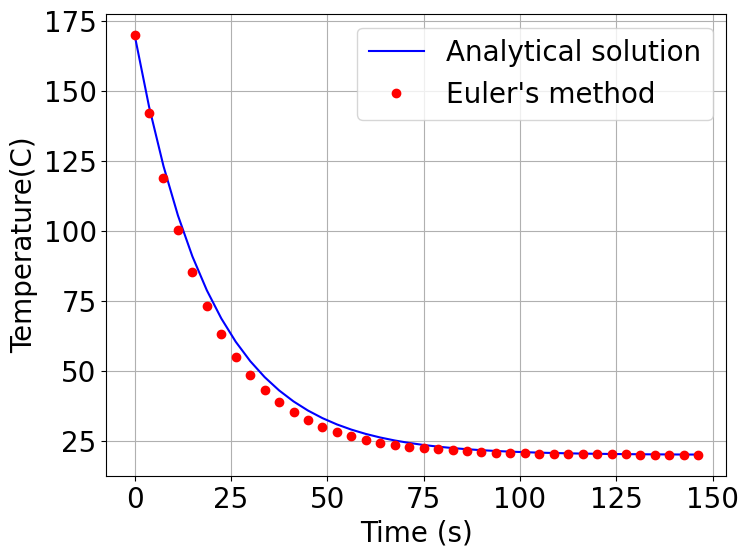

In [143]:
# Perform the Euler method to numerical solve a differential equation (Newton's heat equation)
#    given some starting condition

# Function which finds the slope
#  for a given time and temperature
def f_diffeq_rhs(t,k,T_env,T):
    myf = -k * ( T - T_env )
    #print(t, T, myf)
    return myf

# Function which evaluates the analytical solution
#  for a given time
def f_ana(t,k,T_env,T_0):
    analytical_f = T_env + ( T_0 - T_env )*np.exp(-k*t)
    return analytical_f


# Set time range (minutes)
a = 0.0
b = 150.0

# Set number of time divisions and step size delta_t
N = 40
delta_t = (b-a)/N
print("delta_t",delta_t)

# Define the initital temperature, the environment temperature, and the constant
T_0 = 170  # C
T_env = 20 # C
k = 0.05 # /min

# Array of time
tpoints  = np.arange(a,b,delta_t)

# Empty lists to store temperature
Tpoints_euler  = []
Tpoints_ana    = []

# Start the process at t=0
Temp = T_0

for t in tpoints:

    # put the temperatures for this time
    #  iteration into the array
    Tpoints_euler.append(Temp)
    Tpoints_ana.append( f_ana(t,k,T_env,T_0) )

    # Use the current time and temperature
    #  and the differential equation to find the slope
    #  at this time then perform euler's method
    #  to find the temp for the next iteration
    Temp += delta_t*f_diffeq_rhs(t,k,T_env,Temp)


plt.figure(figsize=(8,6))

plt.plot(tpoints,Tpoints_ana, "b" , label='Analytical solution')
plt.plot(tpoints,Tpoints_euler, "ro" , label="Euler's method")

plt.xlabel("Time (s)" , fontsize=20)
plt.ylabel("Temperature(C)" , fontsize=20)

plt.legend(loc='upper right', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)

plt.show()

### Solution

delta_t 3.3333333333333335


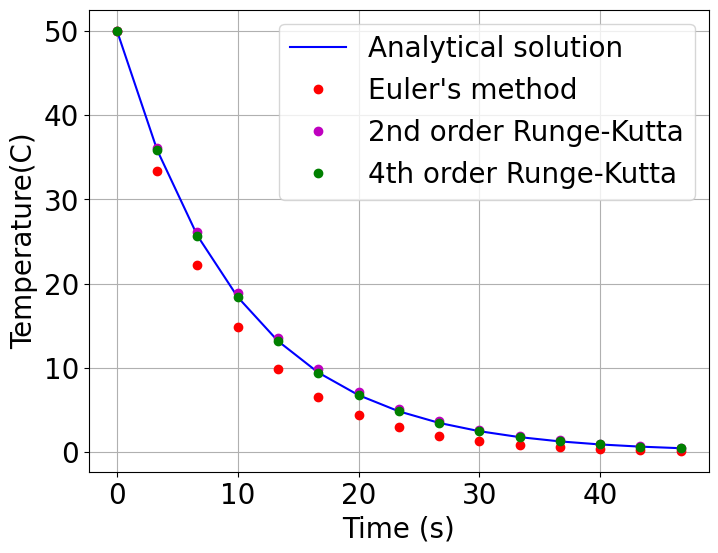

In [144]:
# Perform the 4th order Runge-Kutta (RK) method
#    and the midpoint method (2nd order RK)
#    and the Euler method (1st order RK)
#    to numerically solve a differential equation (Newton's heat equation)
#    given some starting condition

# function to be used for numerical calculation
def f_num(t,T,k,T_env):
    myf = -k * ( T - T_env )
    #print(t, T, myf)
    return myf

# already solved analytical function for comparison
def f_ana(t,k,T_0,T_env):
    analytical_f = T_env + ( T_0 - T_env )*np.exp(-k*t)
    return analytical_f


# Set time range (seconds)
a = 0.0
b = 50.0

# Set number of time divisions and step size delta_t
N = 15
delta_t = (b-a)/N
print("delta_t",delta_t)

# Define the initital temperature, the environment temperature, and the constant
T_0 = 50
T_env = 0
k = 0.1

# Start the process at t=0
Temp1 = T_0
Temp2 = T_0
Temp3 = T_0

tpoints  = np.arange(a,b,delta_t)
Tpoints_eul  = []
Tpoints_rk2  = []
Tpoints_rk4  = []
Tpoints_actual = []

for t in tpoints:

    # put the values for this time into the array
    Tpoints_eul.append(Temp1)
    Tpoints_rk2.append(Temp2)
    Tpoints_rk4.append(Temp3)
    Tpoints_actual.append( f_ana(t,k,T_0,T_env) )

    # setup the values for the next time iteration

    #  perform euler's method
    Temp1 += delta_t*f_num(t,Temp1,k,T_env)

    # perform 2nd order Runge-Kutta method
    k1 = delta_t * f_num( t, Temp2, k , T_env)
    k2 = delta_t * f_num( t+0.5*delta_t, Temp2+0.5*k1, k, T_env)
    Temp2 += k2

    # perform 4th order Runge-Kutta method
    k1 = delta_t * f_num(t,Temp3,k ,T_env)
    k2 = delta_t * f_num(t+0.5*delta_t,Temp3+0.5*k1,k ,T_env)
    k3 = delta_t * f_num(t+0.5*delta_t,Temp3+0.5*k2,k ,T_env)
    k4 = delta_t * f_num(t+delta_t,Temp3+k3,k ,T_env)
    Temp3 += (k1+2*k2+2*k3+k4)/6


plt.figure(figsize=(8,6))

plt.plot(tpoints,Tpoints_actual, "b" , label='Analytical solution')

plt.plot(tpoints,Tpoints_eul, "ro" , label="Euler's method")
plt.plot(tpoints,Tpoints_rk2, "mo" , label="2nd order Runge-Kutta")
plt.plot(tpoints,Tpoints_rk4, "go" , label="4th order Runge-Kutta")

plt.xlabel("Time (s)" , fontsize=20)
plt.ylabel("Temperature(C)" , fontsize=20)

plt.legend(loc='upper right', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)

plt.show()

#### Further examples:

Lets try solving a different differential equation. Lets also generalize our functions for solving using these methods:

$\frac{dx}{dt} =  -x^3 + \sin(t)$

In [145]:
# ------------------------------------------------------------------------
# define ode to be used for testing numerical methods to solve differential equations
# dx/dt = f(x,t)
def f(x,t):
    return -x**3 + np.sin(t)


In [146]:

# ------------------------------------------------------------------------
# Estimate the solution to a differential equation using Euler's method
def run_euler(a,b,N,x_initial):

    delta_t = (b-a)/N  # find the step size delta_t
    x = x_initial      # Set the initial condition
    time_array  = np.arange(a,b,delta_t)  # array for iteration
    print("Run Euler: delta_t = ",delta_t, )

    # lists to track x and t for each step
    tpoints  = []
    xpoints  = []

    # loop over the time range with step size delta_t
    for t in time_array:
        xpoints.append(x) # put the values for this time into the array
        tpoints.append(t) # keep track of the time for plotting
        #  perform euler's method (setup the values for the next time iteration)
        x += delta_t * f(x,t)

    return xpoints, tpoints

# ------------------------------------------------------------------------
# Estimate the solution to a differential equation using the midpoint method (2nd order RK)
def run_rk2(a,b,N,x_initial):

    delta_t = (b-a)/N  # find the step size delta_t
    x = x_initial      # Set the initial condition
    time_array  = np.arange(a,b,delta_t)  # array for iteration
    print("Run RK2: delta_t = ",delta_t)

    # lists to track x and t for each step
    tpoints  = []
    xpoints  = []

    # loop over the time range with step size delta_t
    for t in time_array:
        xpoints.append(x) # put the values for this time into the array
        tpoints.append(t) # keep track of the time for plotting

        # perform 2nd order Runge-Kutta method (setup the values for the next time iteration)
        k1 = delta_t * f( x, t )
        k2 = delta_t * f( x + 0.5*k1 , t + 0.5*delta_t )
        x += k2

    return xpoints, tpoints

# ------------------------------------------------------------------------
# Estimate the solution to a differential equation using the 4th order RK method
def run_rk4(a,b,N,x_initial):

    delta_t = (b-a)/N  # find the step size delta_t
    x = x_initial      # Set the initial condition
    time_array  = np.arange(a,b,delta_t)  # array for iteration
    print("Run RK4: delta_t = ",delta_t)

    # lists to track x and t for each step
    tpoints  = []
    xpoints  = []

    # loop over the time range with step size delta_t
    for t in time_array:
        xpoints.append(x) # put the values for this time into the array
        tpoints.append(t) # keep track of the time for plotting

        # perform 4th order Runge-Kutta method
        k1 = delta_t * f(x, t)
        k2 = delta_t * f(x + 0.5*k1 , t + 0.5*delta_t )
        k3 = delta_t * f(x + 0.5*k2 , t + 0.5*delta_t )
        k4 = delta_t * f(x + k3, t + delta_t)
        x += ( k1 + 2*k2 + 2*k3 + k4 )/6
    return xpoints, tpoints

In [147]:
# ------------------------------------------------------------------------

# Set time range a->b (seconds), the number of steps N, and the initial ocndition
a = 0.0
b = 10.0
x_initial = 0

# Run the euler method
euA_x, euA_t = run_euler(a,b, 10,x_initial)
euB_x, euB_t = run_euler(a,b, 20,x_initial)
euC_x, euC_t = run_euler(a,b, 50,x_initial)

# Run RK2
rk2A_x, rk2A_t = run_rk2(a,b, 10,x_initial)
rk2B_x, rk2B_t = run_rk2(a,b, 20,x_initial)
rk2C_x, rk2C_t = run_rk2(a,b, 50,x_initial)

# Run RK4
rk4A_x, rk4A_t = run_rk4(a,b, 10,x_initial)
rk4B_x, rk4B_t = run_rk4(a,b, 20,x_initial)
rk4C_x, rk4C_t = run_rk4(a,b, 50,x_initial)

Run Euler: delta_t =  1.0
Run Euler: delta_t =  0.5
Run Euler: delta_t =  0.2
Run RK2: delta_t =  1.0
Run RK2: delta_t =  0.5
Run RK2: delta_t =  0.2
Run RK4: delta_t =  1.0
Run RK4: delta_t =  0.5
Run RK4: delta_t =  0.2


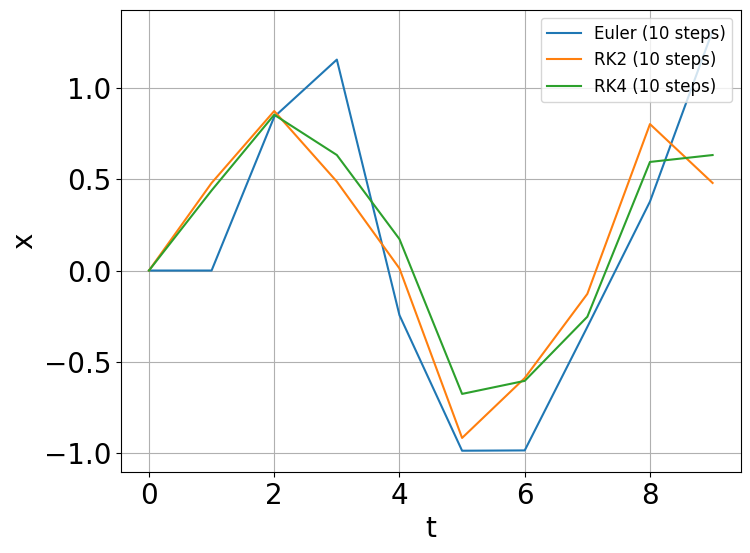

In [148]:

plt.figure(figsize=(8,6))
plt.plot( euA_t, euA_x, "-" , label="Euler (10 steps)")
plt.plot(rk2A_t,rk2A_x, "-" , label="RK2 (10 steps)")
plt.plot(rk4A_t,rk4A_x, "-" , label="RK4 (10 steps)")
plt.xlabel("t" , fontsize=20)
plt.ylabel("x" , fontsize=20)
plt.legend(loc='upper right', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.show()


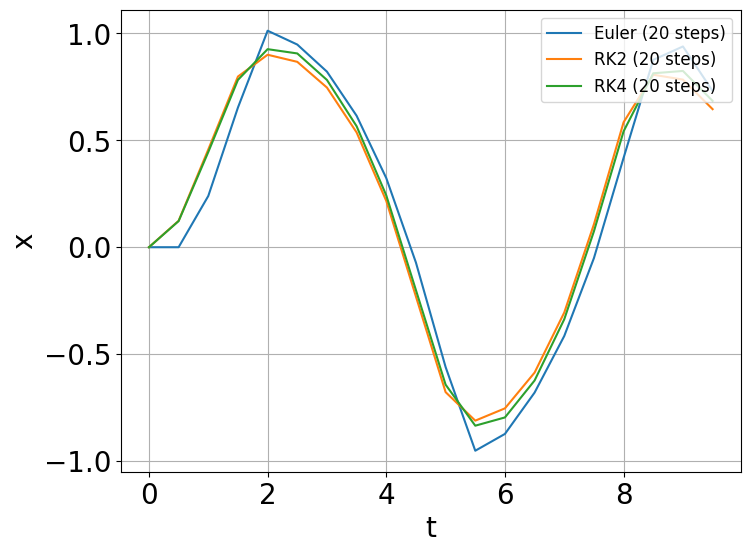

In [149]:
plt.figure(figsize=(8,6))
plt.plot( euB_t, euB_x, "-" , label="Euler (20 steps)")
plt.plot(rk2B_t,rk2B_x, "-" , label="RK2 (20 steps)")
plt.plot(rk4B_t,rk4B_x, "-" , label="RK4 (20 steps)")
plt.xlabel("t" , fontsize=20)
plt.ylabel("x" , fontsize=20)
plt.legend(loc='upper right', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.show()


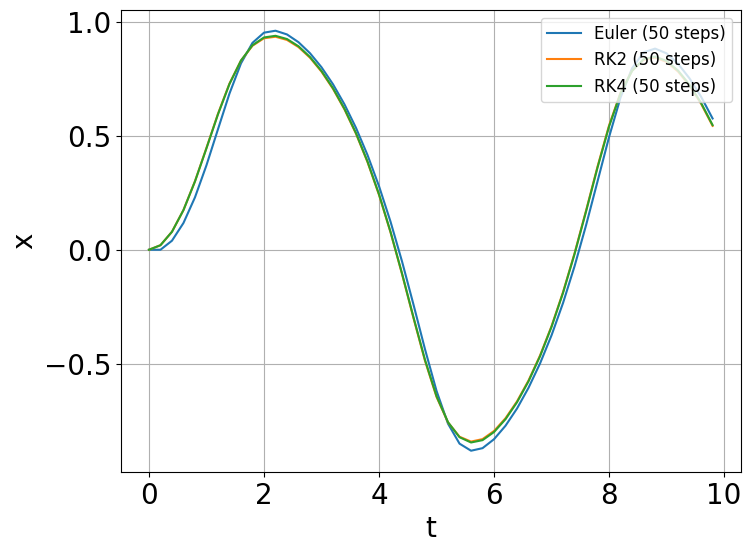

In [150]:

plt.figure(figsize=(8,6))
plt.plot( euC_t, euC_x, "-" , label="Euler (50 steps)")
plt.plot(rk2C_t,rk2C_x, "-" , label="RK2 (50 steps)")
plt.plot(rk4C_t,rk4C_x, "-" , label="RK4 (50 steps)")
plt.xlabel("t" , fontsize=20)
plt.ylabel("x" , fontsize=20)
plt.legend(loc='upper right', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.show()

### Solutions over an infinite range

We want to solve a differential equation over an infinite time range

Example: Solve the following differential equation from t=0 to t=$\infty$, given x=1 at t=0.

$\frac{dx}{dt}=\frac{1}{x^2+t^2}$

Generally we want to solve:

$\frac{dx}{dt}=f(x,t)$

Change of variables

$u = \frac{t}{1+t}$

$t = \frac{u}{1-u}$

Chain rule:

$\frac{dx}{du}\frac{du}{dt}=f(x,t)$

$\frac{dx}{du}=\frac{dt}{du}f(x,t)=\frac{dt}{du}f(x,\frac{u}{1-u})$

Plugigng in the derivative of t with respect to u:

$\frac{dx}{du}=\frac{1}{(1-u)^2}f(x,\frac{u}{1-u})$

Define:

$g(x,u)=\frac{1}{(1-u)^2}f(x,\frac{u}{1-u})$

Now we have a new diffential equaiton:

$\frac{dx}{du}=g(x,u)$

If we solve this from u = 0 to u = 1, it will be equivalent to solving from t = 0 to t = $\infty$

| t     | u   |
|:---:  |:---:|
| 0     | 0 |
| 1     | 1/2 |
| 2     | 2/3      |
| 3     | 3/4      |
| 4     | 4/5      |
| 5     | 5/6      |
| 6     | 6/7      |
| 7     | 7/8      |
| 8     | 8/9      |
| 9     | 9/10      |
| 10000     | 10000/10001      |
| 100000     | 100000/100001      |


In [151]:
# ------------------------------------------------------------------------
# dx/du = g(x,u) where u = t/(1+t), g(x,u) = f( x, u/(1-u)) / (1-u)**2
def g(x,u):
    return 1 /( x**2 * (1-u)**2 + u**2 )

# ------------------------------------------------------------------------
# Estimate the solution to a differential equation using Euler's method
def run_euler_transformed(a,b,N,x_initial):

    delta_u = (b-a)/N  # find the step size delta_t
    x = x_initial      # Set the initial condition (r is a 1D numpy array (a vector))
    u_array  = np.arange(a,b,delta_u)  # array for iteration
    print("Run Euler: delta_u = ",delta_u, " x_initial = ",x_initial)

    # lists to track x and t for each step
    tpoints  = []
    upoints  = []
    xpoints  = []

    # loop over the time range with step size delta_t
    for u in u_array:
        t = u/(1-u)
        xpoints.append(x) # put the values for this time into the array
        upoints.append(u)
        tpoints.append(t) # keep track of the time for plotting
        #print(u, t, x)
        #  perform euler's method (setup the values for the next time iteration)
        x += delta_u * g(x, u)

    return xpoints, upoints, tpoints


# ------------------------------------------------------------------------
# Estimate the solution to a differential equation using the 4th order RK method
def run_rk4_transformed(a,b,N,x_initial):

    delta_u = (b-a)/N  # find the step size delta_t
    x = x_initial      # Set the initial condition
    u_array  = np.arange(a,b,delta_u)  # array for iteration
    print("Run RK4: delta_u = ",delta_u, " x_initial = ",x_initial)

    # lists to track x and t for each step
    upoints  = []
    tpoints  = []
    xpoints  = []

    # loop over the time range with step size delta_t
    for u in u_array:
        t = u/(1-u)
        xpoints.append(x) # put the values for this time into the array
        upoints.append(u)
        tpoints.append(t) # keep track of the time for plotting
        #print(u, t, x)
        # perform 4th order Runge-Kutta method
        k1 = delta_u * g(x, u)
        k2 = delta_u * g(x + 0.5*k1 , u + 0.5*delta_u )
        k3 = delta_u * g(x + 0.5*k2 , u + 0.5*delta_u )
        k4 = delta_u * g(x + k3, u + delta_u)
        x += ( k1 + 2*k2 + 2*k3 + k4 )/6
    return xpoints, upoints, tpoints



In [152]:
# ------------------------------------------------------------------------
# main

# u 0->1 corresponds to t 0->inf
a = 0.0
b = 1.0
N = 100
x_initial = 1.0

# Run Euler
eul_ex84_x, eul_ex84_u, eul_ex84_t = run_euler_transformed(a,b,N,x_initial)

# Run RK4
rk4_ex84_x, rk4_ex84_u, rk4_ex84_t = run_rk4_transformed(a,b,N,x_initial)

Run Euler: delta_u =  0.01  x_initial =  1.0
Run RK4: delta_u =  0.01  x_initial =  1.0


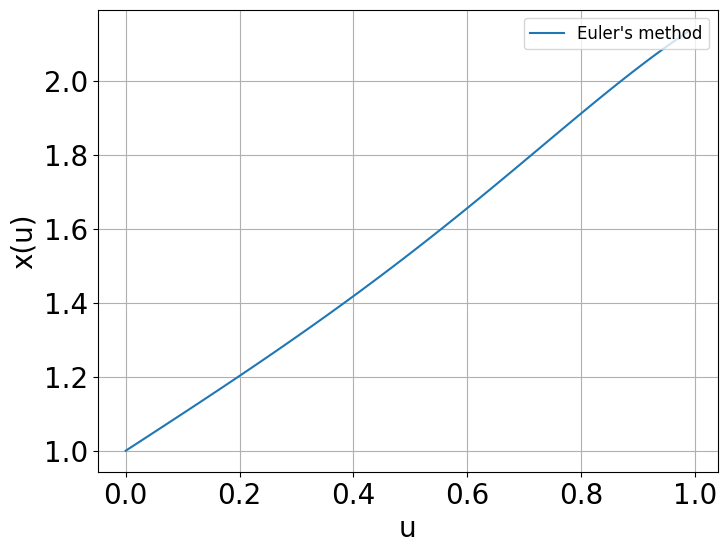

In [153]:
plt.figure(figsize=(8,6))
plt.plot( eul_ex84_u, eul_ex84_x, "-" , label="Euler's method")
plt.xlabel("u" , fontsize=20)
plt.ylabel("x(u)" , fontsize=20)
plt.legend(loc='upper right', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.show()

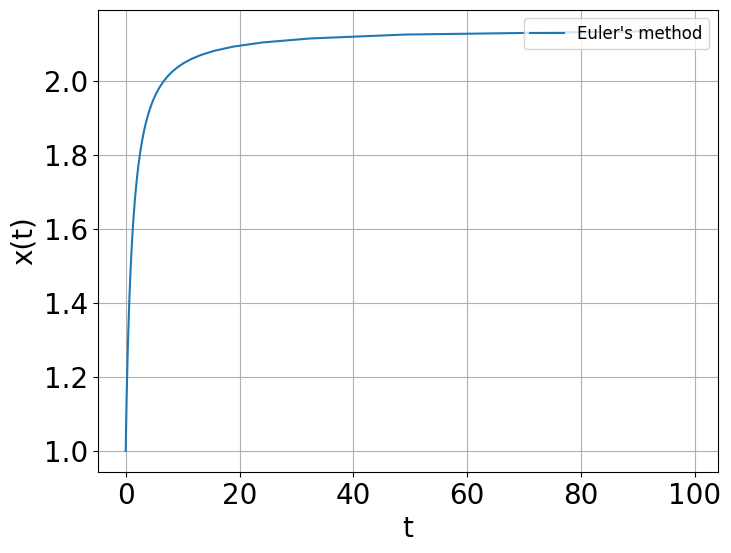

In [154]:
plt.figure(figsize=(8,6))
plt.plot( eul_ex84_t, eul_ex84_x, "-" , label="Euler's method")
plt.xlabel("t" , fontsize=20)
plt.ylabel("x(t)" , fontsize=20)
plt.legend(loc='upper right', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.show()

### Solving 2nd order DiffEQ

In [155]:
# Define general functions to solve simultaneous differential equations

# ------------------------------------------------------------------------
# Estimate the solution to a differential equation using Euler's method
def run_euler_vec(a,b,N,r_initial):

    delta_t = (b-a)/N  # find the step size delta_t
    r = r_initial      # Set the initial condition (r is a 1D numpy array (a vector))
    time_array  = np.arange(a,b,delta_t)  # array for iteration
    print("Run Euler: delta_t = ",delta_t, " r_initial = ",r_initial)

    # lists to track x and t for each step
    tpoints  = []
    xpoints  = []
    ypoints  = []

    # loop over the time range with step size delta_t
    for t in time_array:
        #print(r[0],r[1])
        xpoints.append(r[0]) # put the values for this time into the array
        ypoints.append(r[1]) # put the values for this time into the array
        tpoints.append(t) # keep track of the time for plotting
        #  perform euler's method (setup the values for the next time iteration)
        r += delta_t * f(r,t)

    return xpoints, ypoints, tpoints

# ------------------------------------------------------------------------
# Estimate the solution to a differential equation using the midpoint method (2nd order RK)
def run_rk2_vec(a,b,N,r_initial):

    delta_t = (b-a)/N  # find the step size delta_t
    r = r_initial      # Set the initial condition
    time_array  = np.arange(a,b,delta_t)  # array for iteration
    print("Run RK2: delta_t = ",delta_t, " r_initial = ",r_initial)

    # lists to track x and t for each step
    tpoints  = []
    xpoints  = []
    ypoints  = []

    # loop over the time range with step size delta_t
    for t in time_array:
        xpoints.append(r[0]) # put the values for this time into the array
        ypoints.append(r[1]) # put the values for this time into the array
        tpoints.append(t) # keep track of the time for plotting

        # perform 2nd order Runge-Kutta method (setup the values for the next time iteration)
        k1 = delta_t * f( r, t )
        k2 = delta_t * f( r + 0.5*k1 , t + 0.5*delta_t )
        r += k2

    return xpoints, ypoints, tpoints

# ------------- -----------------------------------------------------------
# Estimate the solution to a differential equation using the 4th order RK method
def run_rk4_vec(a,b,N,r_initial):

    delta_t = (b-a)/N  # find the step size delta_t
    r = r_initial      # Set the initial condition
    time_array  = np.arange(a,b,delta_t)  # array for iteration
    print("Run RK4: delta_t = ",delta_t, " r_initial = ",r_initial)

    # lists to track x and t for each step
    tpoints  = []
    xpoints  = []
    ypoints  = []

    # loop over the time range with step size delta_t
    for t in time_array:
        xpoints.append(r[0]) # put the values for this time into the array
        ypoints.append(r[1]) # put the values for this time into the array
        tpoints.append(t) # keep track of the time for plotting

        # perform 4th order Runge-Kutta method
        k1 = delta_t * f(r, t)
        k2 = delta_t * f(r + 0.5*k1 , t + 0.5*delta_t )
        k3 = delta_t * f(r + 0.5*k2 , t + 0.5*delta_t )
        k4 = delta_t * f(r + k3, t + delta_t)
        r += ( k1 + 2*k2 + 2*k3 + k4 )/6
    return xpoints, ypoints, tpoints


# ------------------------------------------------------------------------
# Estimate the solution to a differential equation using the leapfrog method
def run_frg_vec(a,b,N,r_initial):

    delta_t = (b-a)/N  # find the step size delta_t
    t = 0
    r1 = r_initial      # Set the initial point
    r2 = r1 + 0.5*delta_t*f(r1,t) # Set the second point
    time_array  = np.arange(a,b,delta_t)  # array for iteration
    print("Run LeapFrog: delta_t = ",delta_t, " r_initial = ",r_initial)

    # lists to track x and t for each step
    tpoints  = []
    xpoints  = []
    ypoints  = []

    # loop over the time range with step size delta_t
    for t in time_array:
        xpoints.append(r1[0]) # put the values for this time into the array
        ypoints.append(r1[1]) # put the values for this time into the array
        tpoints.append(t) # keep track of the time for plotting

        # perform leapfrog method (setup the values for the next time iteration)
        r1 += delta_t * f(r2, t)
        r2 += delta_t * f(r1, t)

    return xpoints, ypoints, tpoints


In [156]:
# Non-linear pendulum


# constants
g = 9.81
l = 0.1
m = 1

# time range
a = 0
b = 5# 5, 500
N = 5000 # 5000

def f(r,t):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -(g/l)*np.sin(theta)
    return np.array([ftheta,fomega],float)


# initial positions
t = 0

start_angle_deg = 190 # Angle in degrees
r = np.array([np.pi*start_angle_deg/180,0.0],float)

x =  l*np.sin(r[0])
y = -l*np.cos(r[0])

print("initial theta, omega = ", r )
print("initial f(theta), f(omega) = ", f(r,t)  )

# Run Euler method
r_init = np.array([np.pi*start_angle_deg/180,0.0],float)
eul_pend_theta, eul_pend_omega, eul_pend_t = run_euler_vec(a, b, N,r_init)

# Run RK2 method
r_init = np.array([np.pi*start_angle_deg/180,0.0],float)
rk2_pend_theta, rk2_pend_omega, rk2_pend_t = run_rk2_vec(a, b, N,r_init)

# Run RK4 method
r_init = np.array([np.pi*start_angle_deg/180,0.0],float)
rk4_pend_theta, rk4_pend_omega, rk4_pend_t = run_rk4_vec(a, b, N,r_init)

# Run LeapFrog method
r_init = np.array([np.pi*start_angle_deg/180,0.0],float)
frg_pend_theta, frg_pend_omega, frg_pend_t = run_frg_vec(a, b, N,r_init)



initial theta, omega =  [3.31612558 0.        ]
initial f(theta), f(omega) =  [ 0.         17.03488623]
Run Euler: delta_t =  0.001  r_initial =  [3.31612558 0.        ]
Run RK2: delta_t =  0.001  r_initial =  [3.31612558 0.        ]
Run RK4: delta_t =  0.001  r_initial =  [3.31612558 0.        ]
Run LeapFrog: delta_t =  0.001  r_initial =  [3.31612558 0.        ]


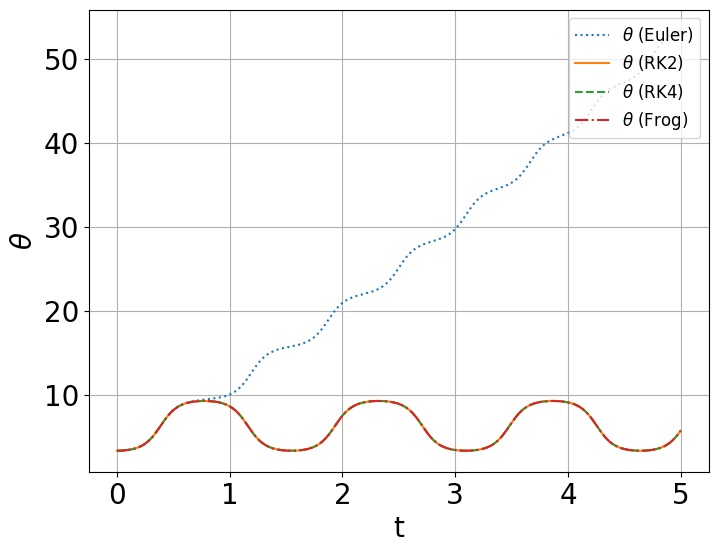

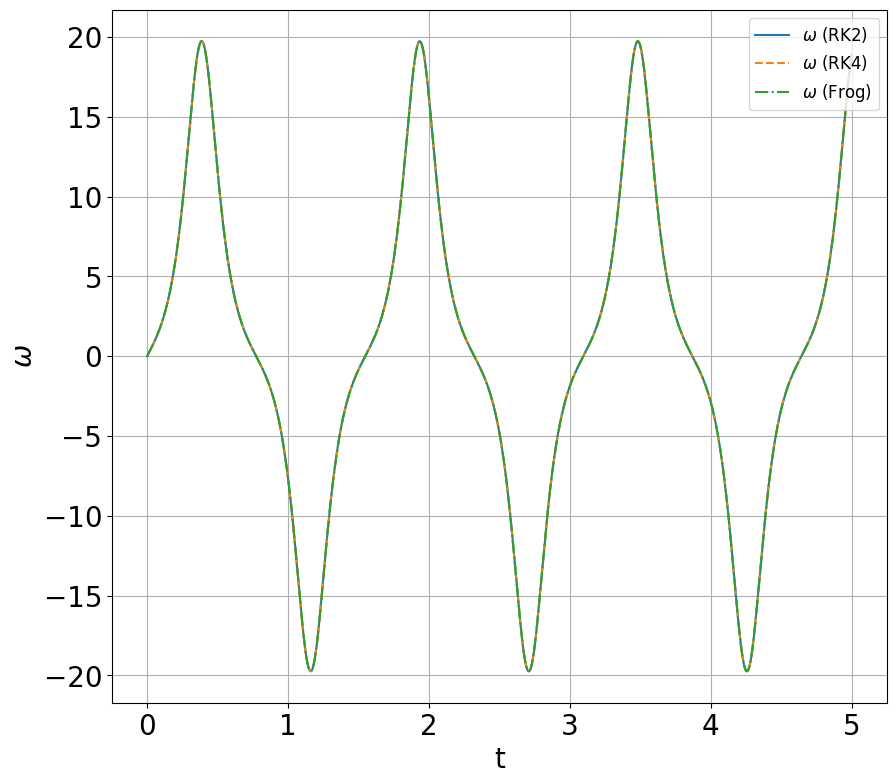

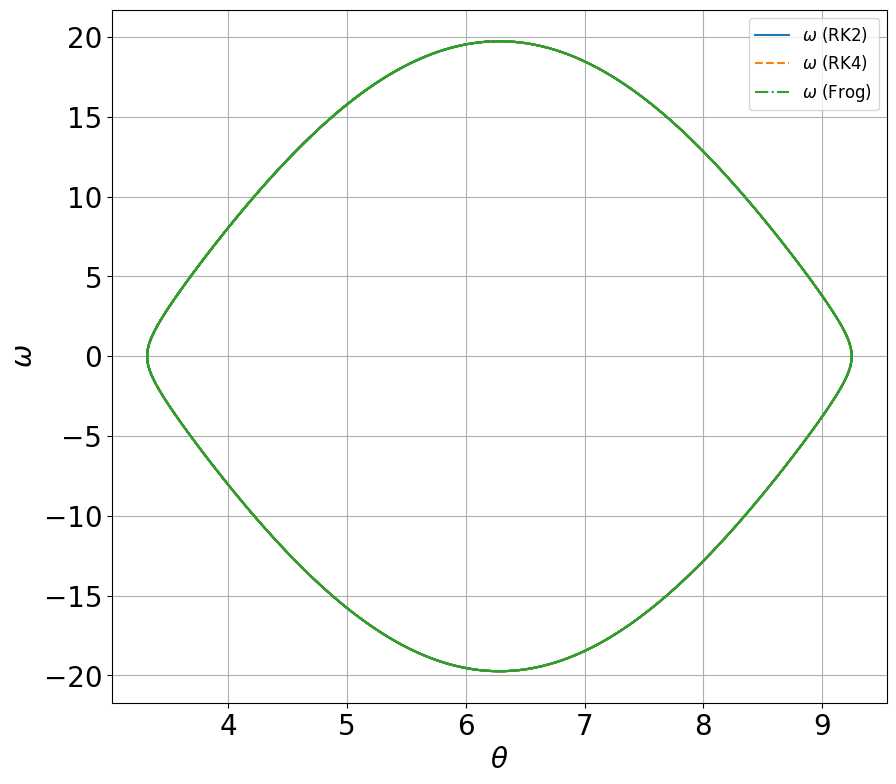

In [157]:

plt.figure(figsize=(8,6))
plt.plot(eul_pend_t, eul_pend_theta, ":" , label=r"$\theta$ (Euler)")
plt.plot(rk2_pend_t, rk2_pend_theta, "-" , label=r"$\theta$ (RK2)")
plt.plot(rk4_pend_t, rk4_pend_theta, "--" , label=r"$\theta$ (RK4)")
plt.plot(frg_pend_t, frg_pend_theta, "-." , label=r"$\theta$ (Frog)")
plt.xlabel("t" , fontsize=20)
plt.ylabel(r"$\theta$" , fontsize=20)
plt.legend(loc='upper right', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.show()


plt.figure(figsize=(10,9))
#plt.plot(eul_pend_t,eul_pend_omega,  ":" , label=r"$\omega$ (Euler)")
plt.plot(rk2_pend_t,rk2_pend_omega,  "-" , label=r"$\omega$ (RK2)")
plt.plot(rk4_pend_t,rk4_pend_omega, "--" , label=r"$\omega$ (RK4)")
plt.plot(frg_pend_t,frg_pend_omega, "-." , label=r"$\omega$ (Frog)")
plt.xlabel("t" , fontsize=20)
plt.ylabel("$\omega$" , fontsize=20)
plt.legend(loc='upper right', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.show()


plt.figure(figsize=(10,9))
#plt.plot(eul_pend_theta, eul_pend_omega, ":" , label=r"$\omega$ (Euler)")
plt.plot(rk2_pend_theta, rk2_pend_omega, "-" , label=r"$\omega$ (RK2)")
plt.plot(rk4_pend_theta, rk4_pend_omega, "--", label=r"$\omega$ (RK4)")
plt.plot(frg_pend_theta, frg_pend_omega, "-.", label=r"$\omega$ (Frog)")
plt.xlabel(r"$\theta$" , fontsize=20)
plt.ylabel("$\omega$" , fontsize=20)
plt.legend(loc='upper right', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.show()

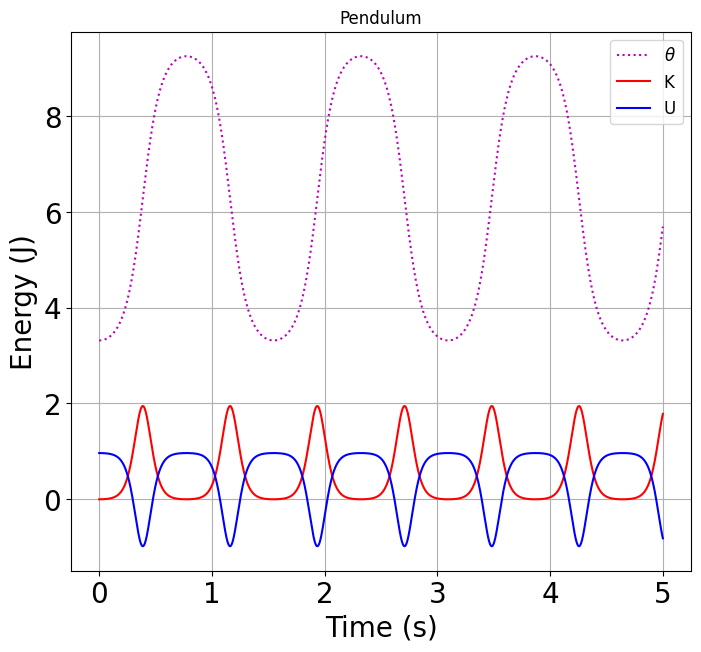

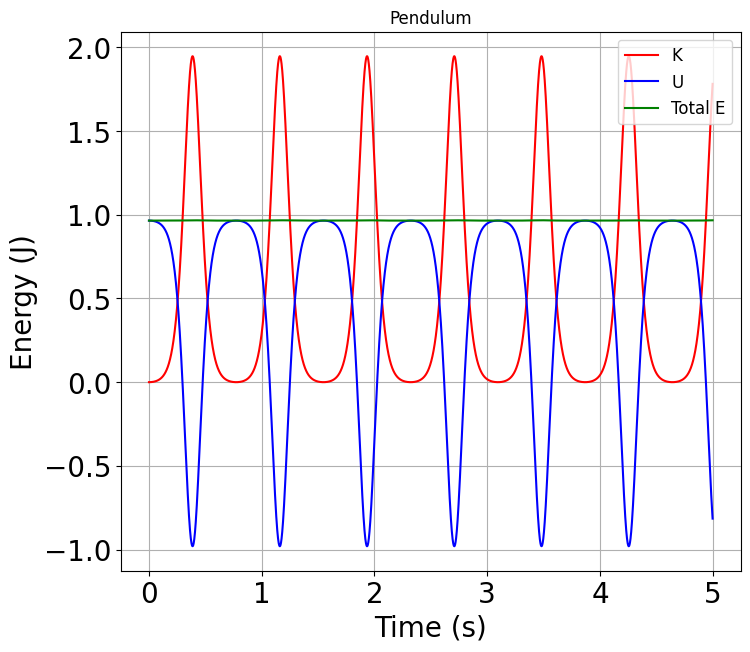

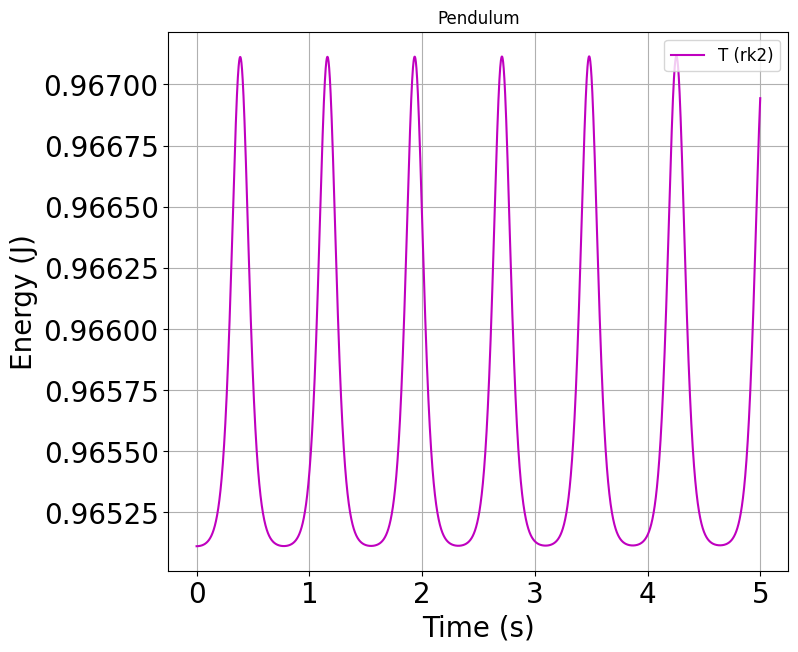

In [158]:
### Calculate Energies

# Convert theta & omega lists to numpy arrays for each method
a_eul_theta  = np.array(eul_pend_theta  , float)
a_eul_omega  = np.array(eul_pend_omega  , float)
a_rk2_theta  = np.array(rk2_pend_theta  , float)
a_rk2_omega  = np.array(rk2_pend_omega  , float)
a_rk4_theta  = np.array(rk4_pend_theta  , float)
a_rk4_omega  = np.array(rk4_pend_omega  , float)
a_frg_theta  = np.array(frg_pend_theta  , float)
a_frg_omega  = np.array(frg_pend_omega  , float)

# Kinetic energy
a_eul_K = 0.5 * m * l * l * a_eul_omega * a_eul_omega  # K = 1/2 I omeaga^2, I = mr^2. K = 1/2 m v^2, v = r*omega.
a_rk2_K = 0.5 * m * l * l * a_rk2_omega * a_rk2_omega  # K = 1/2 I omeaga^2, I = mr^2. K = 1/2 m v^2, v = r*omega.
a_rk4_K = 0.5 * m * l * l * a_rk4_omega * a_rk4_omega  # K = 1/2 I omeaga^2, I = mr^2. K = 1/2 m v^2, v = r*omega.
a_frg_K = 0.5 * m * l * l * a_frg_omega * a_frg_omega  # K = 1/2 I omeaga^2, I = mr^2. K = 1/2 m v^2, v = r*omega.

# height
a_eul_y = -l * np.cos(a_eul_theta) # pivot point is y = 0. lowest point is y = -l.
a_rk2_y = -l * np.cos(a_rk2_theta) # pivot point is y = 0. lowest point is y = -l.
a_rk4_y = -l * np.cos(a_rk4_theta) # pivot point is y = 0. lowest point is y = -l.
a_frg_y = -l * np.cos(a_frg_theta) # pivot point is y = 0. lowest point is y = -l.

# Potential energy
a_eul_U = m * 9.8 * a_eul_y
a_rk2_U = m * 9.8 * a_rk2_y
a_rk4_U = m * 9.8 * a_rk4_y
a_frg_U = m * 9.8 * a_frg_y

# Total energy
a_eul_T = a_eul_K + a_eul_U
a_rk2_T = a_rk2_K + a_rk2_U
a_rk4_T = a_rk4_K + a_rk4_U
a_frg_T = a_frg_K + a_frg_U

### Plot

plt.figure(figsize=(8,7))
plt.plot(rk4_pend_t, a_rk4_theta, "m:" , label=r'$\theta$') # label=r'text' -> raw string for latex use
plt.plot(rk4_pend_t, a_rk4_K    , "r"  , label=r'K') # label=r'text' -> raw string for latex use
plt.plot(rk4_pend_t, a_rk4_U    , "b"  , label=r'U') # label=r'text' -> raw string for latex use
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.title('Pendulum')
plt.xlabel("Time (s)" , fontsize=20)
plt.ylabel("Energy (J)" , fontsize=20)
plt.legend(loc='upper right', fontsize=12)
plt.show()


plt.figure(figsize=(8,7))
plt.plot(rk4_pend_t, a_rk4_K, "r" , label=r'K') # label=r'text' -> raw string for latex use
plt.plot(rk4_pend_t, a_rk4_U, "b" , label=r'U') # label=r'text' -> raw string for latex use
plt.plot(rk4_pend_t, a_rk4_T, "g" , label=r'Total E') # label=r'text' -> raw string for latex use
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.title('Pendulum')
plt.xlabel("Time (s)" , fontsize=20)
plt.ylabel("Energy (J)" , fontsize=20)
plt.legend(loc='upper right', fontsize=12)
#plt.savefig('figs/NoDrag_EvsT.png', dpi=100)
plt.show()


plt.figure(figsize=(8,7))
#plt.plot(rk4_pend_t, a_frg_T, color = 'yellowgreen',  label=r'T (frog)') # label=r'text' -> raw string for latex use

#plt.plot(rk4_pend_t, a_eul_T, 'r',  label=r'T (euler)') # label=r'text' -> raw string for latex use

plt.plot(rk4_pend_t, a_rk2_T, 'm',  label=r'T (rk2)') # label=r'text' -> raw string for latex use

plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.title('Pendulum')
plt.xlabel("Time (s)" , fontsize=20)
plt.ylabel("Energy (J)" , fontsize=20)
plt.legend(loc='upper right', fontsize=12)
plt.show()

### Projectile trajectory with air resistance

In [159]:
# Estimate the trajectory of a ball subjected to F_grav and F_drag
#  using the 4th order Runge-Kutta (RK) method

import numpy as np
import matplotlib.pyplot as plt


# Default constant definitions and initial conditions
#  constants
g   = 9.81       # acceleration due to gravity [m/s^2]
m   = 1.0        # mass = 1 kg
rho = 1.22       # air density [kg/m^3]
D   = 0.47       # Drag coefficient
R   = 0.08       # Radius of sphere [m]

#  initial conditions
h     = 0 # intitial height above the ground
theta = 75   # launch angle [degrees converted to radians]
v0    = 100  # initial velocity [m/s]

#  Set the time step for estimating the differential equation solution
delta_t = 0.1   # [s]


def f(r,const,g):
    x  = r[0]
    y  = r[1]
    vx = r[2]
    vy = r[3]
    fx = vx
    fy = vy
    fvx = -const*vx*np.sqrt(vx*vx+vy*vy)
    fvy = -const*vy*np.sqrt(vx*vx+vy*vy) - g
    #print("fx  = ",fx)
    #print("fy  = ",fy)
    #print("fvx = ",fvx)
    #print("fvy = ",fvy)
    return np.array( [fx,fy,fvx,fvy], float )


def trajectory(h, theta, v0, g, m, rho, D, R, delta_t):

    print("Find trajectory","h",h,", theta",theta,", v0",v0, ", g",g,", m", m,", rho", rho,", D",D,", R", R,", delta_t", delta_t)
    # Define constant
    c = (rho*D*np.pi*R*R)/(2*m)

    # Convert launch angle to radians
    theta*=   np.pi / 180

    # Initiate array containting position and velocity [x,y,vx,vy]
    #   x_i = 0  (initial x position)
    #   y_i = 0  (initial x position)
    #   vx_i = |v_i|cos(theta)  (x-component of initial velocity vector)
    #   vy_i = |v_i|sin(theta)  (y-component of initial velocity vector)
    r = np.array([ 0.0, h, v0*np.cos(theta), v0*np.sin(theta)] )

    # Store the x and y position for each time step
    l_x  = []
    l_y  = []
    l_vx = []
    l_vy = []
    l_t  = []

    # Time loop
    time=0
    while r[1] >= 0.0:  # stay in loop as long as you are above height = 0 (above the ground)
        #print("height = ",r[1] )
        l_x.append(r[0])
        l_y.append(r[1])
        l_vx.append(r[2])
        l_vy.append(r[3])
        l_t.append(time)
        time += delta_t

        # perform 4th order Runge-Kutta method
        k1 = delta_t * f(r,c,g)
        k2 = delta_t * f(r+0.5*k1,c,g)
        k3 = delta_t * f(r+0.5*k2,c,g)
        k4 = delta_t * f(r+k3,c,g)
        r += (k1+2*k2+2*k3+k4)/6


    return l_x, l_y, l_vx, l_vy, l_t

In [160]:
temp_theta = 75
temp_delta_t = 0.25

# def trajectory(h, theta, v0, g, m, rho, D, R, delta_t):
#b0_x, b0_y, b0_vx, b0_vy, b0_t = trajectory(h, temp_theta, v0, g, m, rho, 3, 0.01, temp_delta_t)


# ------------------------------------------------------
# Trajectory with no air resistance

b0_x, b0_y, b0_vx, b0_vy, b0_t = trajectory(h, temp_theta, v0, g, m, rho, 0, 0.01, temp_delta_t)
c0_x, c0_y, c0_vx, c0_vy, c0_t = trajectory(h, temp_theta, v0, g, 4, rho, 0, 0.01, temp_delta_t)

# ------------------------------------------------------
# Trajectory with air resistance for different ball sizes
b1_x, b1_y, b1_vx, b1_vy, b1_t = trajectory(h, temp_theta, v0, g, m, rho, D, 0.01, temp_delta_t)
b2_x, b2_y, b2_vx, b2_vy, b2_t = trajectory(h, temp_theta, v0, g, m, rho, D, 0.02, temp_delta_t)
b3_x, b3_y, b3_vx, b3_vy, b3_t = trajectory(h, temp_theta, v0, g, m, rho, D, 0.03, temp_delta_t)
b4_x, b4_y, b4_vx, b4_vy, b4_t = trajectory(h, temp_theta, v0, g, m, rho, D, 0.04, temp_delta_t)
b5_x, b5_y, b5_vx, b5_vy, b5_t = trajectory(h, temp_theta, v0, g, m, rho, D, 0.05, temp_delta_t)
b6_x, b6_y, b6_vx, b6_vy, b6_t = trajectory(h, temp_theta, v0, g, m, rho, D, 0.06, temp_delta_t)


# ------------------------------------------------------
# Trajectory with air resistance for different masses
c1_x, c1_y, c1_vx, c1_vy, c1_t = trajectory(h, temp_theta, v0, g, m, rho, D, 0.04, temp_delta_t)
c2_x, c2_y, c2_vx, c2_vy, c2_t = trajectory(h, temp_theta, v0, g, 2*m, rho, D, 0.04, temp_delta_t)
c3_x, c3_y, c3_vx, c3_vy, c3_t = trajectory(h, temp_theta, v0, g, 3*m, rho, D, 0.04, temp_delta_t)
c4_x, c4_y, c4_vx, c4_vy, c4_t = trajectory(h, temp_theta, v0, g, 4*m, rho, D, 0.04, temp_delta_t)




# ------------------------------------------------------
# Trajectory with air resistance for different launch angles
d1_x, d1_y, d1_vx, d1_vy, d1_t = trajectory(h, 10, v0, g, m, rho, D, 0.04, temp_delta_t)
d2_x, d2_y, d2_vx, d2_vy, d2_t = trajectory(h, 20, v0, g, m, rho, D, 0.04, temp_delta_t)
d3_x, d3_y, d3_vx, d3_vy, d3_t = trajectory(h, 30, v0, g, m, rho, D, 0.04, temp_delta_t)
d4_x, d4_y, d4_vx, d4_vy, d4_t = trajectory(h, 40, v0, g, m, rho, D, 0.04, temp_delta_t)
d5_x, d5_y, d5_vx, d5_vy, d5_t = trajectory(h, 50, v0, g, m, rho, D, 0.04, temp_delta_t)
d6_x, d6_y, d6_vx, d6_vy, d6_t = trajectory(h, 60, v0, g, m, rho, D, 0.04, temp_delta_t)
d7_x, d7_y, d7_vx, d7_vy, d7_t = trajectory(h, 70, v0, g, m, rho, D, 0.04, temp_delta_t)
d8_x, d8_y, d8_vx, d8_vy, d8_t = trajectory(h, 80, v0, g, m, rho, D, 0.04, temp_delta_t)
d9_x, d9_y, d9_vx, d9_vy, d9_t = trajectory(h, 90, v0, g, m, rho, D, 0.04, temp_delta_t)


# ------------------------------------------------------
# Trajectory without air resistance for different launch angles
e1_x, e1_y, e1_vx, e1_vy, e1_t = trajectory(h, 10, v0, g, m, rho, 0, 0.04, temp_delta_t)
e2_x, e2_y, e2_vx, e2_vy, e2_t = trajectory(h, 20, v0, g, m, rho, 0, 0.04, temp_delta_t)
e3_x, e3_y, e3_vx, e3_vy, e3_t = trajectory(h, 30, v0, g, m, rho, 0, 0.04, temp_delta_t)
e4_x, e4_y, e4_vx, e4_vy, e4_t = trajectory(h, 40, v0, g, m, rho, 0, 0.04, temp_delta_t)
e5_x, e5_y, e5_vx, e5_vy, e5_t = trajectory(h, 50, v0, g, m, rho, 0, 0.04, temp_delta_t)
e6_x, e6_y, e6_vx, e6_vy, e6_t = trajectory(h, 60, v0, g, m, rho, 0, 0.04, temp_delta_t)
e7_x, e7_y, e7_vx, e7_vy, e7_t = trajectory(h, 70, v0, g, m, rho, 0, 0.04, temp_delta_t)
e8_x, e8_y, e8_vx, e8_vy, e8_t = trajectory(h, 80, v0, g, m, rho, 0, 0.04, temp_delta_t)
e9_x, e9_y, e9_vx, e9_vy, e9_t = trajectory(h, 90, v0, g, m, rho, 0, 0.04, temp_delta_t)



# ------------------------------------------------------
# Trajectory with air resistance for different launch angles (smaller variation)
f1_x, f1_y, f1_vx, f1_vy, f1_t = trajectory(h, 38, v0, g, m, rho, D, 0.04, 0.1)
f2_x, f2_y, f2_vx, f2_vy, f2_t = trajectory(h, 39, v0, g, m, rho, D, 0.04, 0.1)
f3_x, f3_y, f3_vx, f3_vy, f3_t = trajectory(h, 40, v0, g, m, rho, D, 0.04, 0.1)
f4_x, f4_y, f4_vx, f4_vy, f4_t = trajectory(h, 41, v0, g, m, rho, D, 0.04, 0.1)
f5_x, f5_y, f5_vx, f5_vy, f5_t = trajectory(h, 42, v0, g, m, rho, D, 0.04, 0.1)
f6_x, f6_y, f6_vx, f6_vy, f6_t = trajectory(h, 43, v0, g, m, rho, D, 0.04, 0.1)
f7_x, f7_y, f7_vx, f7_vy, f7_t = trajectory(h, 44, v0, g, m, rho, D, 0.04, 0.1)
f8_x, f8_y, f8_vx, f8_vy, f8_t = trajectory(h, 45, v0, g, m, rho, D, 0.04, 0.1)
f9_x, f9_y, f9_vx, f9_vy, f9_t = trajectory(h, 46, v0, g, m, rho, D, 0.04, 0.1)



# ------------------------------------------------------
# Trajectory without air resistance for different launch angles

g0_x, g0_y, g0_vx, g0_vy, g0_t = trajectory(700,   0, v0, g, m, rho, 0, 0.04, temp_delta_t)

g3_x, g3_y, g3_vx, g3_vy, g3_t = trajectory(700, -30, v0, g, m, rho, 0, 0.04, temp_delta_t)
g4_x, g4_y, g4_vx, g4_vy, g4_t = trajectory(700,  30, v0, g, m, rho, 0, 0.04, temp_delta_t)
g5_x, g5_y, g5_vx, g5_vy, g5_t = trajectory(700, -60, v0, g, m, rho, 0, 0.04, temp_delta_t)
g6_x, g6_y, g6_vx, g6_vy, g6_t = trajectory(700,  60, v0, g, m, rho, 0, 0.04, temp_delta_t)
g7_x, g7_y, g7_vx, g7_vy, g7_t = trajectory(700, -90, v0, g, m, rho, 0, 0.04, temp_delta_t)
g8_x, g8_y, g8_vx, g8_vy, g8_t = trajectory(700,  90, v0, g, m, rho, 0, 0.04, temp_delta_t)



# ------------------------------------------------------
# Falling object (no initial velocity)

#                                trajectory(h, theta, v0, g, m, rho, D, R, delta_t):
h0_x, h0_y, h0_vx, h0_vy, h0_t = trajectory(1000, 0, 0, g, 100, rho, 0, 0.04, temp_delta_t)
h1_x, h1_y, h1_vx, h1_vy, h1_t = trajectory(1000, 0, 0, g, 100, rho, D, 0.5, temp_delta_t)
h2_x, h2_y, h2_vx, h2_vy, h2_t = trajectory(1000, 0, 0, g, 100, rho, D, 10, temp_delta_t)


Find trajectory h 0 , theta 75 , v0 100 , g 9.81 , m 1.0 , rho 1.22 , D 0 , R 0.01 , delta_t 0.25
Find trajectory h 0 , theta 75 , v0 100 , g 9.81 , m 4 , rho 1.22 , D 0 , R 0.01 , delta_t 0.25
Find trajectory h 0 , theta 75 , v0 100 , g 9.81 , m 1.0 , rho 1.22 , D 0.47 , R 0.01 , delta_t 0.25
Find trajectory h 0 , theta 75 , v0 100 , g 9.81 , m 1.0 , rho 1.22 , D 0.47 , R 0.02 , delta_t 0.25
Find trajectory h 0 , theta 75 , v0 100 , g 9.81 , m 1.0 , rho 1.22 , D 0.47 , R 0.03 , delta_t 0.25
Find trajectory h 0 , theta 75 , v0 100 , g 9.81 , m 1.0 , rho 1.22 , D 0.47 , R 0.04 , delta_t 0.25
Find trajectory h 0 , theta 75 , v0 100 , g 9.81 , m 1.0 , rho 1.22 , D 0.47 , R 0.05 , delta_t 0.25
Find trajectory h 0 , theta 75 , v0 100 , g 9.81 , m 1.0 , rho 1.22 , D 0.47 , R 0.06 , delta_t 0.25
Find trajectory h 0 , theta 75 , v0 100 , g 9.81 , m 1.0 , rho 1.22 , D 0.47 , R 0.04 , delta_t 0.25
Find trajectory h 0 , theta 75 , v0 100 , g 9.81 , m 2.0 , rho 1.22 , D 0.47 , R 0.04 , delta_t 0.2

[  0.           5.48357196  10.95203749  16.39045616  21.78421568
  27.11918652  32.38186545  37.55950518  42.64022759  47.61311861
  52.46830362  57.19700274  61.79156606  66.24548945  70.55341198
  74.71109657  78.71539565  82.56420393  86.2564004   89.79178188
  93.17099017  96.39543499  99.46721459 102.38903563 105.16413409
 107.79619814 110.28929434 112.64779776 114.87632674 116.97968266
 118.96279497 120.83067163 122.58835486 124.24088215 125.79325227
 127.25039604 128.61715161 129.89824378 131.09826716 132.22167274
 133.27275747 134.25565665 135.17433871 136.03260203 136.83407361
 137.58220934 138.28029547 138.93145128 139.53863259 140.104636
 140.63210371 141.12352881 141.58126081 142.00751149 142.40436083
 142.77376296 143.11755226 143.43744919 143.73506624 144.01191365
 144.26940493 144.50886233 144.73152203 144.93853915 145.13099257
 145.30988949 145.47616985 145.63071049 145.77432907 145.90778785
 146.0317972  146.14701898 146.2540697  146.35352344 146.4459147
 146.53174102

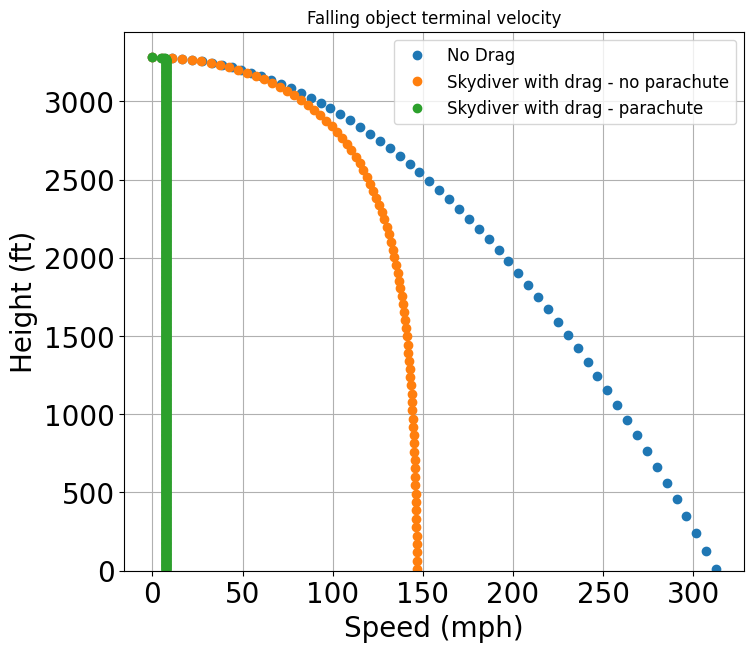

In [161]:
# Plot no drag trajectory
plt.figure(figsize=(8,7))

convert_mps_to_mph = 2.23694
convert_m_to_ft    = 3.28084

ah0_vy  = np.array(h0_vy  , float)
ah1_vy  = np.array(h1_vy  , float)
ah2_vy  = np.array(h2_vy  , float)
ah0_y  = np.array(h0_y  , float)
ah1_y  = np.array(h1_y  , float)
ah2_y  = np.array(h2_y  , float)

speed_0 = np.abs(ah0_vy) * convert_mps_to_mph
speed_1 = np.abs(ah1_vy) * convert_mps_to_mph
speed_2 = np.abs(ah2_vy) * convert_mps_to_mph

height_0 = ah0_y * convert_m_to_ft
height_1 = ah1_y * convert_m_to_ft
height_2 = ah2_y * convert_m_to_ft

print(speed_1)

plt.plot( speed_0, height_0, "o" , label='No Drag')
plt.plot( speed_1, height_1, "o" , label='Skydiver with drag - no parachute')   # label=r'text' -> raw string for latex use
plt.plot( speed_2, height_2, "o" , label='Skydiver with drag - parachute')   # label=r'text' -> raw string for latex use
plt.ylim(0.0)
#plt.axis('square')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.title('Falling object terminal velocity')
plt.xlabel("Speed (mph)" , fontsize=20)
plt.ylabel("Height (ft)" , fontsize=20)
plt.legend(loc='upper right', fontsize=12)
plt.savefig('TerminalVelocity_VYvsY.png', dpi=100)
plt.show()

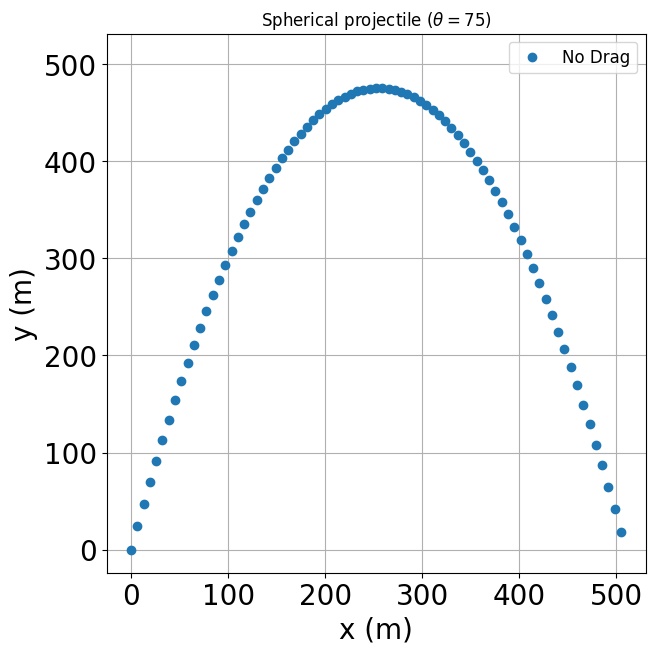

In [162]:
# Plot no drag trajectory
plt.figure(figsize=(8,7))
plt.plot(b0_x, b0_y, "o" , label='No Drag')   # label=r'text' -> raw string for latex use
plt.ylim(0.0)
plt.axis('square')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.title(r'Spherical projectile ($\theta='+str(temp_theta)+'$)')
plt.xlabel("x (m)" , fontsize=20)
plt.ylabel("y (m)" , fontsize=20)
plt.legend(loc='upper right', fontsize=12)
plt.savefig('NoDrag_YvsX.png', dpi=100)
plt.show()

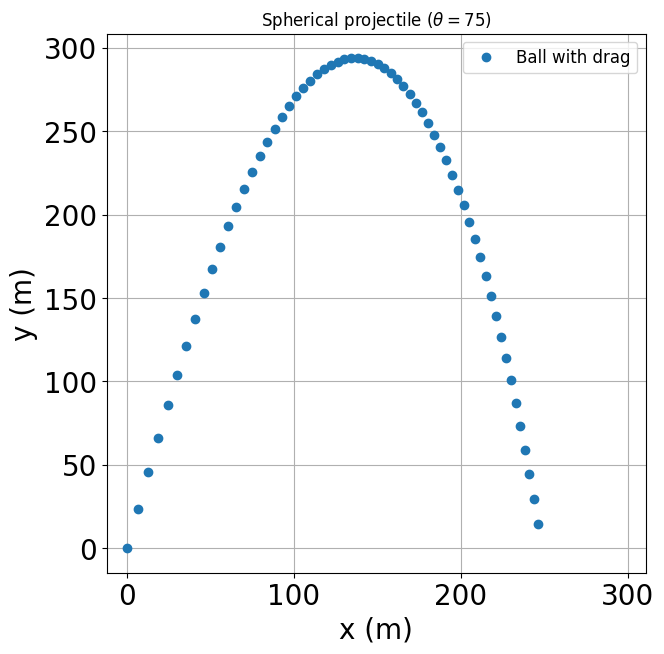

In [163]:
plt.figure(figsize=(8,7))
plt.plot(b4_x, b4_y, "o" , label='Ball with drag')   # label=r'text' -> raw string for latex use
plt.ylim(0.0)
plt.axis('square')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.title(r'Spherical projectile ($\theta='+str(temp_theta)+'$)')
plt.xlabel("x (m)" , fontsize=20)
plt.ylabel("y (m)" , fontsize=20)
plt.legend(loc='upper right', fontsize=12)
#plt.savefig('figs/Drag_YvsX.png', dpi=100)
plt.show()

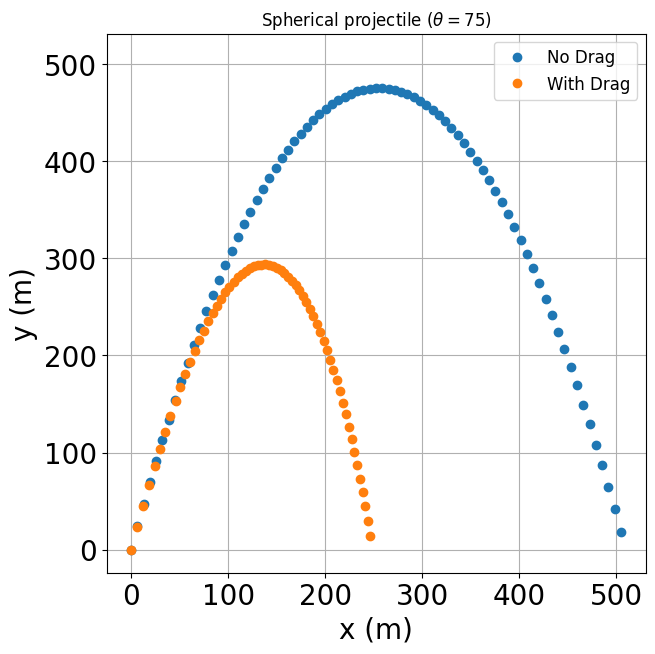

In [164]:
plt.figure(figsize=(8,7))
plt.plot(b0_x, b0_y, "o" , label='No Drag')   # label=r'text' -> raw string for latex use
plt.plot(b4_x, b4_y, "o" , label='With Drag') # label=r'text' -> raw string for latex use
plt.ylim(0.0)
plt.axis('square')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.title(r'Spherical projectile ($\theta='+str(temp_theta)+'$)')
plt.xlabel("x (m)" , fontsize=20)
plt.ylabel("y (m)" , fontsize=20)
plt.legend(loc='upper right', fontsize=12)
#plt.savefig('figs/CompareDragNoDrag_YvsX.png', dpi=100)
plt.show()

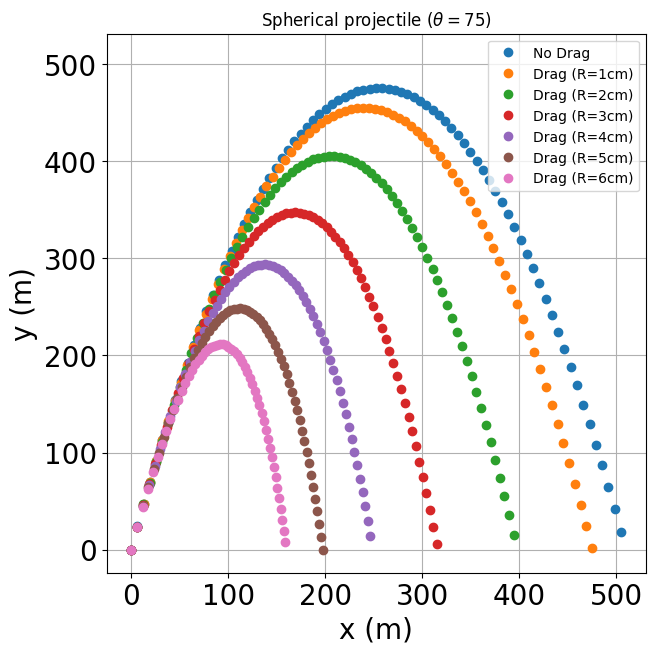

In [165]:
plt.figure(figsize=(8,7))
plt.plot(b0_x, b0_y, "o" , label='No Drag')   # label=r'text' -> raw string for latex use
plt.plot(b1_x, b1_y, "o" , label='Drag (R=1cm)')   # label=r'text' -> raw string for latex use
plt.plot(b2_x, b2_y, "o" , label='Drag (R=2cm)') # label=r'text' -> raw string for latex use
plt.plot(b3_x, b3_y, "o" , label='Drag (R=3cm)') # label=r'text' -> raw string for latex use
plt.plot(b4_x, b4_y, "o" , label='Drag (R=4cm)') # label=r'text' -> raw string for latex use
plt.plot(b5_x, b5_y, "o" , label='Drag (R=5cm)') # label=r'text' -> raw string for latex use
plt.plot(b6_x, b6_y, "o" , label='Drag (R=6cm)') # label=r'text' -> raw string for latex use
plt.ylim(0.0)
plt.axis('square')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.title(r'Spherical projectile ($\theta='+str(temp_theta)+'$)')
plt.xlabel("x (m)" , fontsize=20)
plt.ylabel("y (m)" , fontsize=20)
plt.legend(loc='upper right', fontsize=10)
#plt.savefig('figs/CompareDragNoDrag_VaryBallSize_YvsX.png', dpi=100)
plt.show()

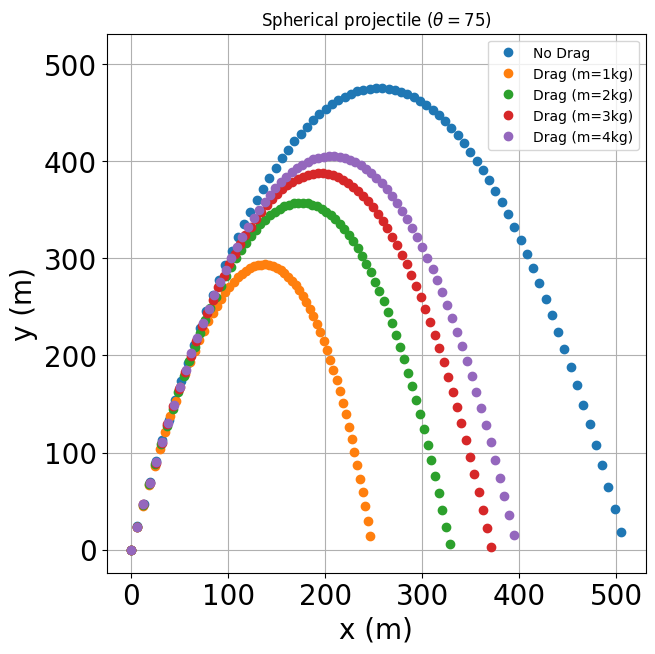

In [166]:
plt.figure(figsize=(8,7))
plt.plot(b0_x, b0_y, "o" , label='No Drag')   # label=r'text' -> raw string for latex use
plt.plot(c1_x, c1_y, "o" , label='Drag (m=1kg)')   # label=r'text' -> raw string for latex use
plt.plot(c2_x, c2_y, "o" , label='Drag (m=2kg)') # label=r'text' -> raw string for latex use
plt.plot(c3_x, c3_y, "o" , label='Drag (m=3kg)') # label=r'text' -> raw string for latex use
plt.plot(c4_x, c4_y, "o" , label='Drag (m=4kg)') # label=r'text' -> raw string for latex use
plt.ylim(0.0)
plt.axis('square')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.title(r'Spherical projectile ($\theta='+str(temp_theta)+'$)')
plt.xlabel("x (m)" , fontsize=20)
plt.ylabel("y (m)" , fontsize=20)
plt.legend(loc='upper right', fontsize=10)
#plt.savefig('figs/CompareDragNoDrag_VaryMass_YvsX.png', dpi=100)
plt.show()

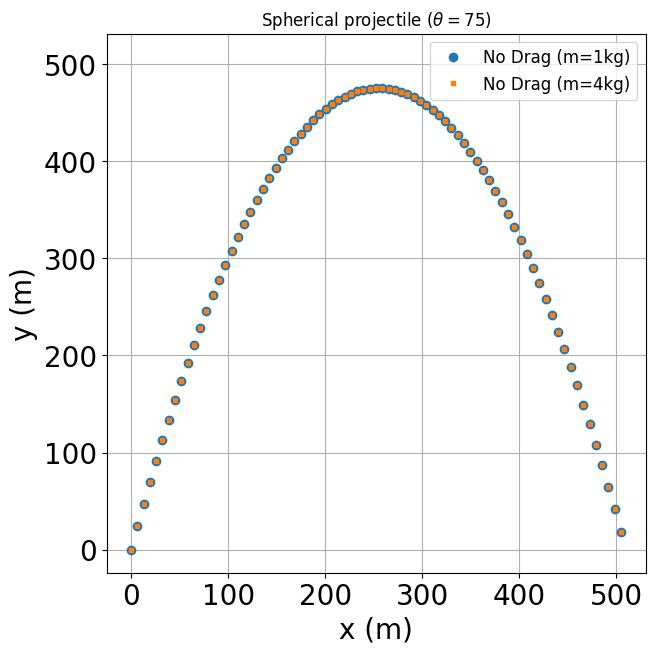

In [167]:
# Plot no drag trajectory
plt.figure(figsize=(8,7))
plt.plot(b0_x, b0_y, "o" , label='No Drag (m=1kg)')   # label=r'text' -> raw string for latex use
plt.plot(c0_x, c0_y, "s" , markersize=3, label='No Drag (m=4kg)')   # label=r'text' -> raw string for latex use
plt.ylim(0.0)
plt.axis('square')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.title(r'Spherical projectile ($\theta='+str(temp_theta)+'$)')
plt.xlabel("x (m)" , fontsize=20)
plt.ylabel("y (m)" , fontsize=20)
plt.legend(loc='upper right', fontsize=12)
#plt.savefig('figs/NoDrag_VaryMass_YvsX.png', dpi=100)
plt.show()

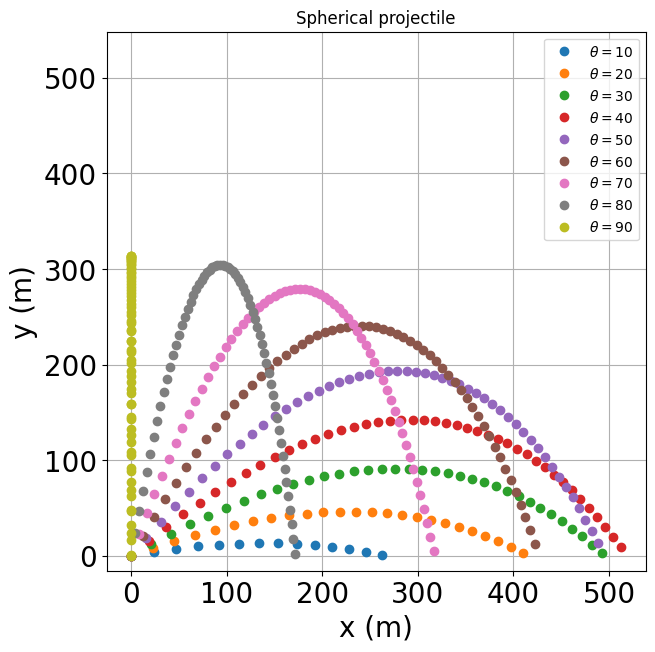

In [168]:
plt.figure(figsize=(8,7))
#plt.plot(b0_x, b0_y, "o" , label='No Drag')   # label=r'text' -> raw string for latex use
plt.plot(d1_x, d1_y, "o" , label=r'$\theta = 10$')   # label=r'text' -> raw string for latex use
plt.plot(d2_x, d2_y, "o" , label=r'$\theta = 20$') # label=r'text' -> raw string for latex use
plt.plot(d3_x, d3_y, "o" , label=r'$\theta = 30$') # label=r'text' -> raw string for latex use
plt.plot(d4_x, d4_y, "o" , label=r'$\theta = 40$') # label=r'text' -> raw string for latex use
plt.plot(d5_x, d5_y, "o" , label=r'$\theta = 50$') # label=r'text' -> raw string for latex use
plt.plot(d6_x, d6_y, "o" , label=r'$\theta = 60$') # label=r'text' -> raw string for latex use
plt.plot(d7_x, d7_y, "o" , label=r'$\theta = 70$') # label=r'text' -> raw string for latex use
plt.plot(d8_x, d8_y, "o" , label=r'$\theta = 80$') # label=r'text' -> raw string for latex use
plt.plot(d9_x, d9_y, "o" , label=r'$\theta = 90$') # label=r'text' -> raw string for latex use
plt.ylim(0.0)
plt.axis('square')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.title(r'Spherical projectile')
plt.xlabel("x (m)" , fontsize=20)
plt.ylabel("y (m)" , fontsize=20)
plt.legend(loc='upper right', fontsize=10)
#plt.savefig('figs/Drag_VaryLaunchAngle_YvsX.png', dpi=100)
plt.show()

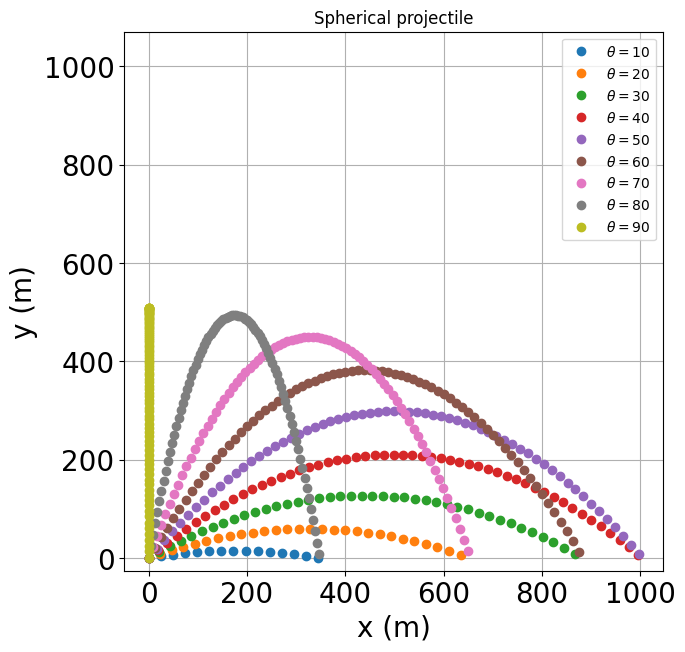

In [169]:
plt.figure(figsize=(8,7))
#plt.plot(b0_x, b0_y, "o" , label='No Drag')   # label=r'text' -> raw string for latex use
plt.plot(e1_x, e1_y, "o" , label=r'$\theta = 10$')   # label=r'text' -> raw string for latex use
plt.plot(e2_x, e2_y, "o" , label=r'$\theta = 20$') # label=r'text' -> raw string for latex use
plt.plot(e3_x, e3_y, "o" , label=r'$\theta = 30$') # label=r'text' -> raw string for latex use
plt.plot(e4_x, e4_y, "o" , label=r'$\theta = 40$') # label=r'text' -> raw string for latex use
plt.plot(e5_x, e5_y, "o" , label=r'$\theta = 50$') # label=r'text' -> raw string for latex use
plt.plot(e6_x, e6_y, "o" , label=r'$\theta = 60$') # label=r'text' -> raw string for latex use
plt.plot(e7_x, e7_y, "o" , label=r'$\theta = 70$') # label=r'text' -> raw string for latex use
plt.plot(e8_x, e8_y, "o" , label=r'$\theta = 80$') # label=r'text' -> raw string for latex use
plt.plot(e9_x, e9_y, "o" , label=r'$\theta = 90$') # label=r'text' -> raw string for latex use
plt.ylim(0.0)
plt.axis('square')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.title(r'Spherical projectile')
plt.xlabel("x (m)" , fontsize=20)
plt.ylabel("y (m)" , fontsize=20)
plt.legend(loc='upper right', fontsize=10)
#plt.savefig('figs/NoDrag_VaryLaunchAngle_YvsX.png', dpi=100)
plt.show()

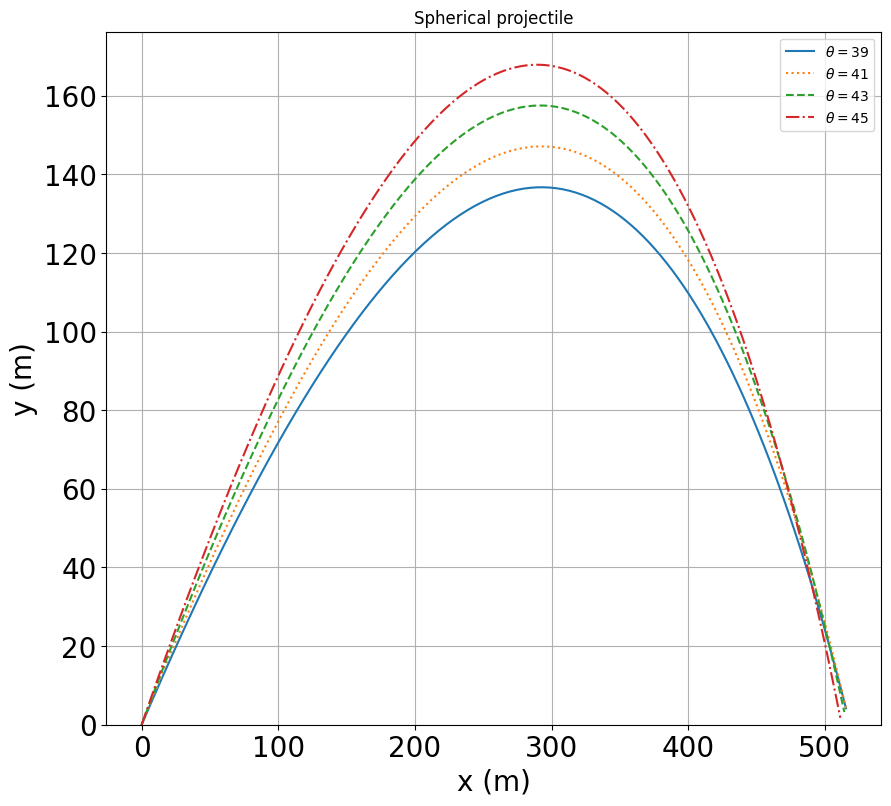

In [170]:
plt.figure(figsize=(10,9))
#plt.plot(b0_x, b0_y, "o" , label='No Drag')   # label=r'text' -> raw string for latex use
#plt.plot(f1_x, f1_y,  "-",  label=r'$\theta = 38$')   # label=r'text' -> raw string for latex use
plt.plot(f2_x, f2_y,   "-", label=r'$\theta = 39$') # label=r'text' -> raw string for latex use
#plt.plot(f3_x, f3_y,  "-",  label=r'$\theta = 40$') # label=r'text' -> raw string for latex use
plt.plot(f4_x, f4_y,   ":", label=r'$\theta = 41$') # label=r'text' -> raw string for latex use
#plt.plot(f5_x, f5_y,  "-",  label=r'$\theta = 42$') # label=r'text' -> raw string for latex use
plt.plot(f6_x, f6_y,   "--", label=r'$\theta = 43$') # label=r'text' -> raw string for latex use
#plt.plot(f7_x, f7_y,  "-",  label=r'$\theta = 44$') # label=r'text' -> raw string for latex use
plt.plot(f8_x, f8_y,   "-.", label=r'$\theta = 45$') # label=r'text' -> raw string for latex use
#plt.plot(f9_x, f9_y,  "-",  label=r'$\theta = 46$') # label=r'text' -> raw string for latex use
plt.ylim(0.0)
#plt.axis('square')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.title(r'Spherical projectile')
plt.xlabel("x (m)" , fontsize=20)
plt.ylabel("y (m)" , fontsize=20)
plt.legend(loc='upper right', fontsize=10)
#plt.savefig('figs/Drag_VaryLaunchAngle_YvsX.png', dpi=100)
plt.show()

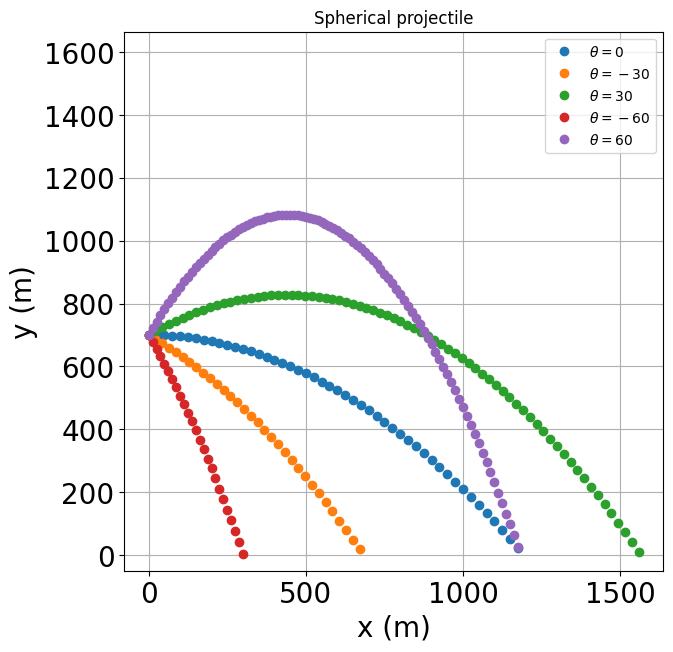

In [171]:
plt.figure(figsize=(8,7))
#plt.plot(b0_x, b0_y, "o" , label='No Drag')   # label=r'text' -> raw string for latex use
#plt.plot(g1_x, g1_y, "o" , label=r'$\theta = 10$')   # label=r'text' -> raw string for latex use
#plt.plot(g2_x, g2_y, "o" , label=r'$\theta = 20$') # label=r'text' -> raw string for latex use
#plt.plot(g3_x, g3_y, "o" , label=r'$\theta = 30$') # label=r'text' -> raw string for latex use
plt.plot(g0_x, g0_y, "o" , label=r'$\theta =   0$') # label=r'text' -> raw string for latex use
plt.plot(g3_x, g3_y, "o" , label=r'$\theta = -30$') # label=r'text' -> raw string for latex use
plt.plot(g4_x, g4_y, "o" , label=r'$\theta = 30$') # label=r'text' -> raw string for latex use
plt.plot(g5_x, g5_y, "o" , label=r'$\theta = -60$') # label=r'text' -> raw string for latex use
plt.plot(g6_x, g6_y, "o" , label=r'$\theta = 60$') # label=r'text' -> raw string for latex use
plt.ylim(0.0)
plt.axis('square')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.title(r'Spherical projectile')
plt.xlabel("x (m)" , fontsize=20)
plt.ylabel("y (m)" , fontsize=20)
plt.legend(loc='upper right', fontsize=10)
#plt.savefig('figs/NoDrag_VaryLaunchAngle_YvsX.png', dpi=100)
plt.show()

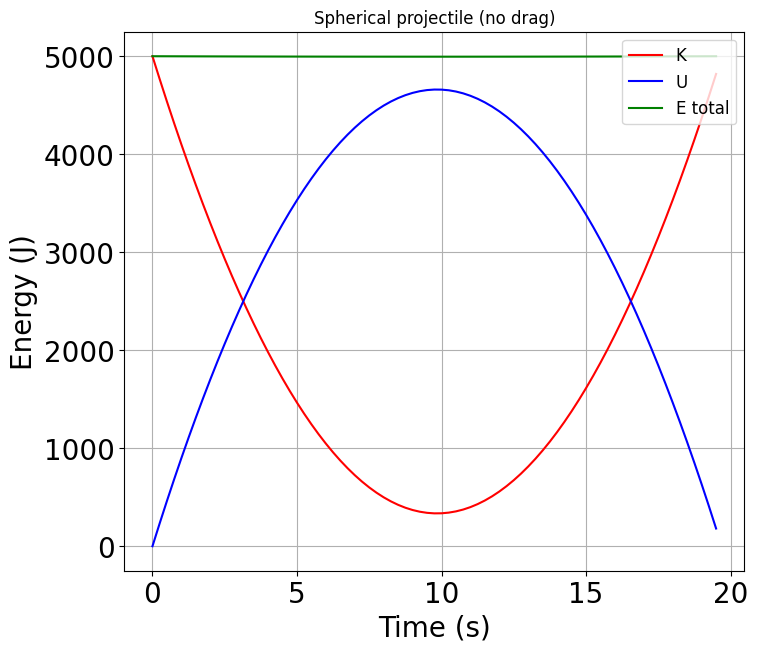

In [172]:
### Calculate Energies
a0_x  = np.array(b0_x  , float)
a0_y  = np.array(b0_y  , float)
a0_vx = np.array(b0_vx , float)
a0_vy = np.array(b0_vy , float)
a0_t  = np.array(b0_t  , float)

a0_v_squared = a0_vx*a0_vx+a0_vy*a0_vy
a0_K         =  0.5 * m * a0_v_squared
a0_U         =  9.8 * m * a0_y
a0_T         = a0_K + a0_U

plt.figure(figsize=(8,7))
plt.plot(a0_t, a0_K, "r" , label=r'K') # label=r'text' -> raw string for latex use
plt.plot(a0_t, a0_U, "b" , label=r'U') # label=r'text' -> raw string for latex use
plt.plot(a0_t, a0_T, "g" , label=r'E total') # label=r'text' -> raw string for latex use
#plt.ylim(0.0)
#plt.axis('square')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.title('Spherical projectile (no drag)')
plt.xlabel("Time (s)" , fontsize=20)
plt.ylabel("Energy (J)" , fontsize=20)
plt.legend(loc='upper right', fontsize=12)
#plt.savefig('figs/NoDrag_EvsT.png', dpi=100)
plt.show()


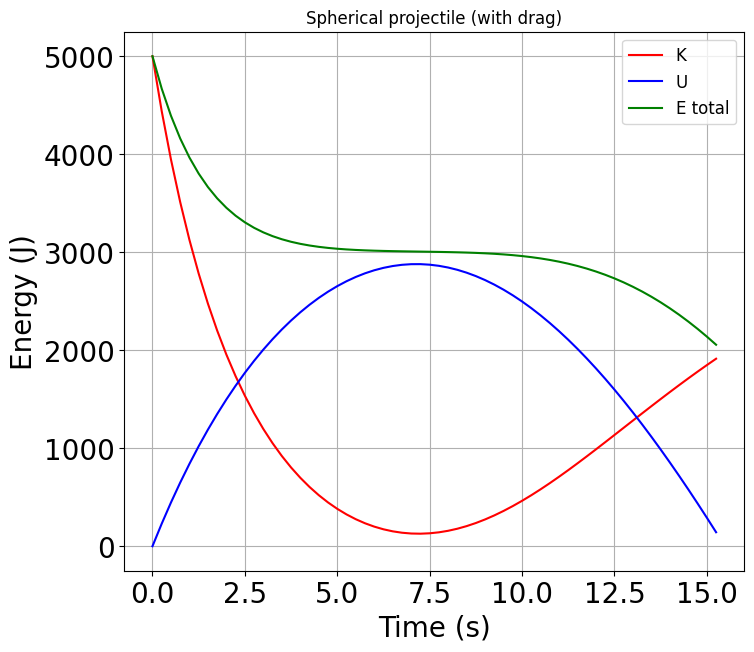

In [173]:
### Calculate Energies
a4_x  = np.array(b4_x  , float)
a4_y  = np.array(b4_y  , float)
a4_vx = np.array(b4_vx , float)
a4_vy = np.array(b4_vy , float)
a4_t  = np.array(b4_t  , float)

a4_v_squared = a4_vx*a4_vx+a4_vy*a4_vy
a4_K         =  0.5 * m * a4_v_squared
a4_U         =  9.8 * m * a4_y
a4_T         = a4_K + a4_U

plt.figure(figsize=(8,7))
plt.plot(a4_t, a4_K, "r" , label=r'K') # label=r'text' -> raw string for latex use
plt.plot(a4_t, a4_U, "b" , label=r'U') # label=r'text' -> raw string for latex use
plt.plot(a4_t, a4_T, "g" , label=r'E total') # label=r'text' -> raw string for latex use
#plt.ylim(0.0)
#plt.axis('square')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.title('Spherical projectile (with drag)')
plt.xlabel("Time (s)" , fontsize=20)
plt.ylabel("Energy (J)" , fontsize=20)
plt.legend(loc='upper right', fontsize=12)
#plt.savefig('figs/Drag_EvsT.png', dpi=100)
plt.show()


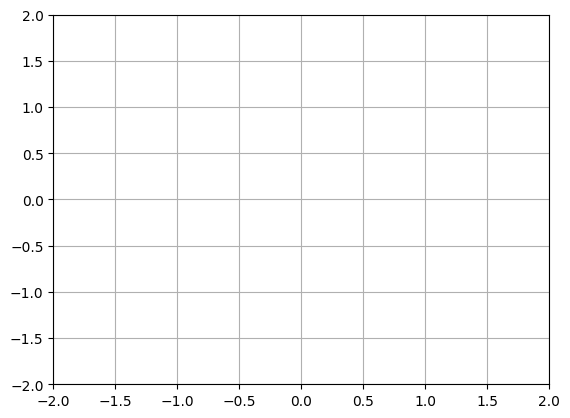

In [174]:
#https://matplotlib.org/examples/animation/double_pendulum_animated.html

"""
===========================
The double pendulum problem
===========================

This animation illustrates the double pendulum problem.
"""

# Double pendulum formula translated from the C code at
# http://www.physics.usyd.edu.au/~wheat/dpend_html/solve_dpend.c

from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg


def derivs(state, t):

    dydx = np.zeros_like(state)
    dydx[0] = state[1]

    del_ = state[2] - state[0]
    den1 = (M1 + M2)*L1 - M2*L1*cos(del_)*cos(del_)
    dydx[1] = (M2*L1*state[1]*state[1]*sin(del_)*cos(del_) +
               M2*G*sin(state[2])*cos(del_) +
               M2*L2*state[3]*state[3]*sin(del_) -
               (M1 + M2)*G*sin(state[0]))/den1

    dydx[2] = state[3]

    den2 = (L2/L1)*den1
    dydx[3] = (-M2*L2*state[3]*state[3]*sin(del_)*cos(del_) +
               (M1 + M2)*G*sin(state[0])*cos(del_) -
               (M1 + M2)*L1*state[1]*state[1]*sin(del_) -
               (M1 + M2)*G*sin(state[2]))/den2

    return dydx

# create a time array from 0..100 sampled at 0.05 second steps
dt = 0.05
t = np.arange(0.0, 20, dt)

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

# initial state
state = np.radians([th1, w1, th2, w2])

# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, t)

x1 = L1*sin(y[:, 0])
y1 = -L1*cos(y[:, 0])

x2 = L2*sin(y[:, 2]) + x1
y2 = -L2*cos(y[:, 2]) + y1

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
                              interval=25, blit=True, init_func=init)

# ani.save('double_pendulum.mp4', fps=15)
plt.show()

#ani.save('the_movie.mp4', writer = 'mencoder', fps=15)

from IPython.display import HTML
HTML(ani.to_html5_video())